Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 349ms/step - loss: 0.0278 - val_loss: 0.0091
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 343ms/step - loss: 0.0085 - val_loss: 0.0070
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 335ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 356ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 358ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 332ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 64s 326ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 339ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 336ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 336ms/step - loss: 0.0043 - val_loss: 0.0043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


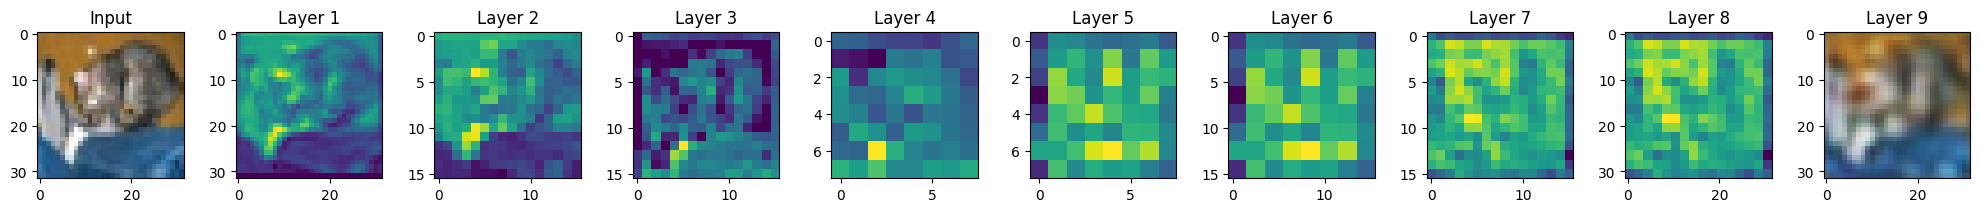

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset and normalize it
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define encoder
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

# Define decoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

# Train the autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
)

# Get layer outputs for visualization
layer_outputs = [layer.output for layer in autoencoder.layers]
visualization_model = Model(inputs=autoencoder.input, outputs=layer_outputs)

# Select a test image
test_image = x_test[:1]

# Get outputs at each layer for the test image
layer_outputs = visualization_model.predict(test_image)

# Visualize the input and outputs at each layer
fig, axes = plt.subplots(1, len(layer_outputs), figsize=(20, 2))
axes[0].imshow(test_image[0])
axes[0].set_title("Input")

# Plot outputs of each layer
for i, output in enumerate(layer_outputs[1:]):
    # Handling multi-channel outputs (select the first channel for simplicity)
    if output.shape[-1] == 3:
        axes[i + 1].imshow(output[0])
    else:
        axes[i + 1].imshow(output[0, :, :, 0], cmap="viridis")
    axes[i + 1].set_title(f"Layer {i+1}")

plt.tight_layout()
plt.show()

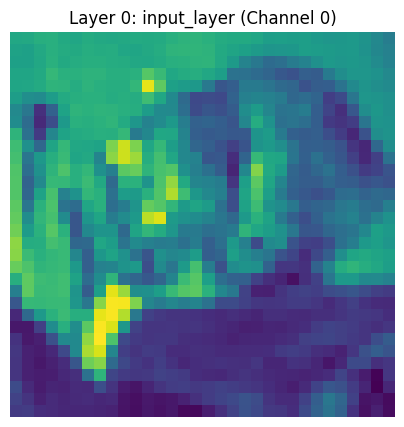

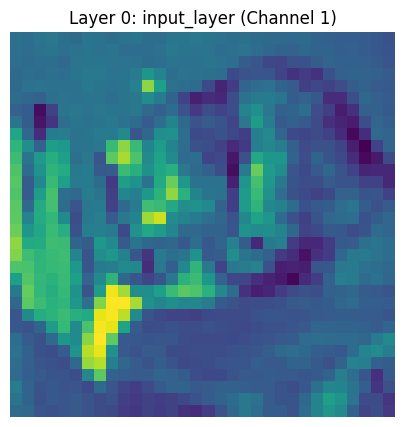

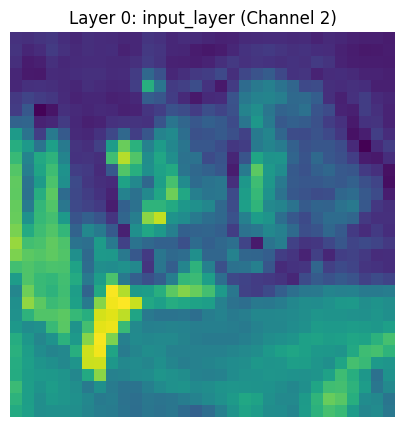

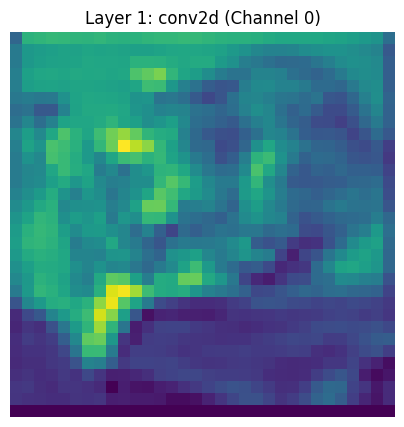

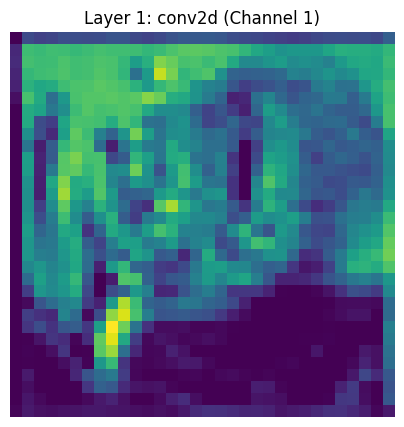

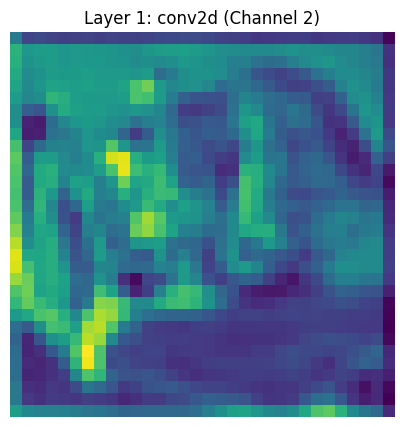

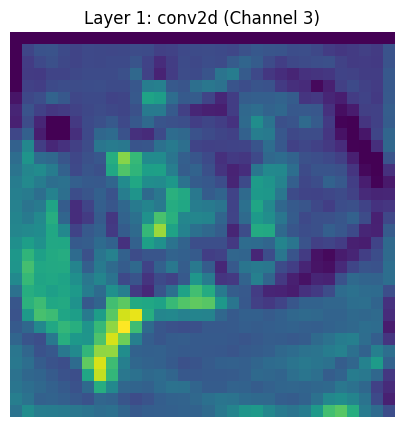

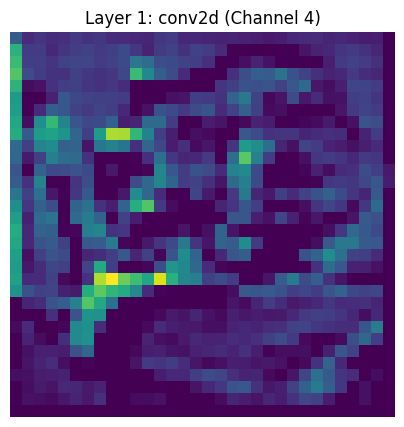

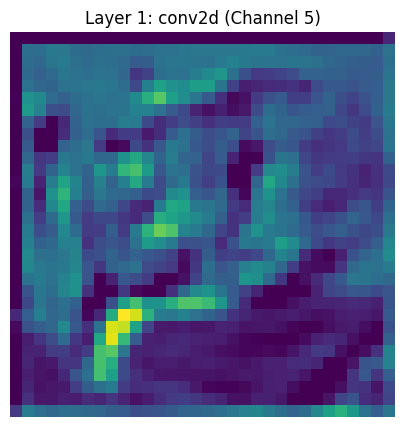

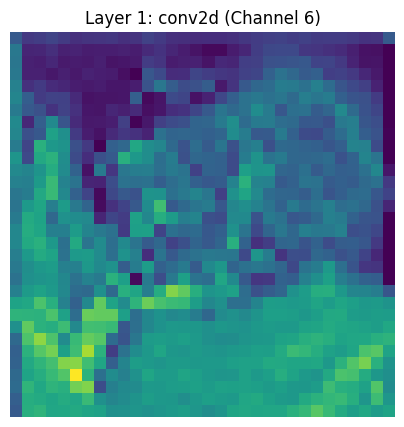

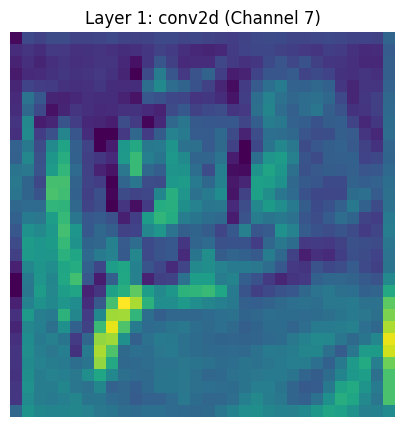

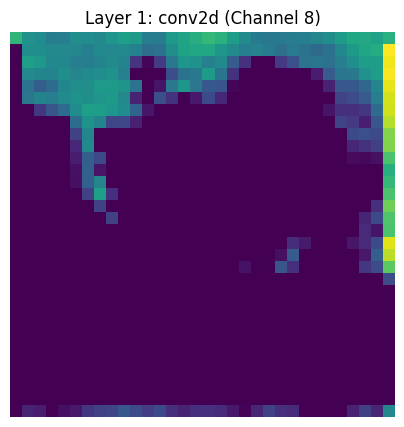

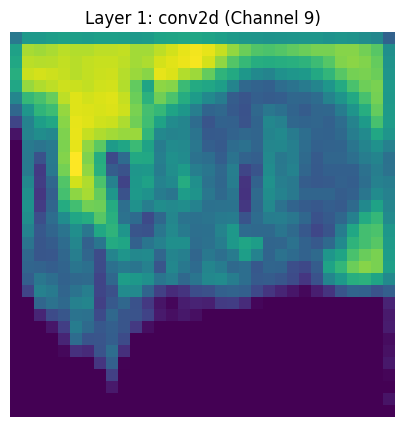

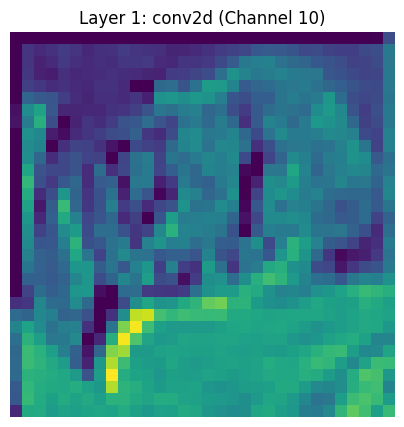

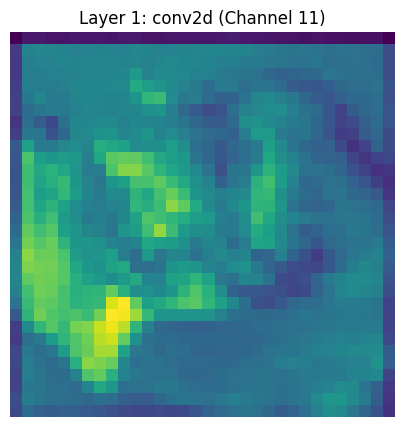

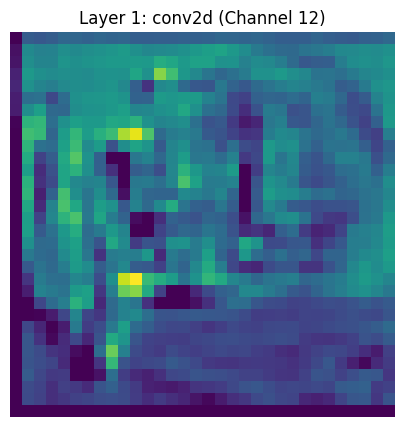

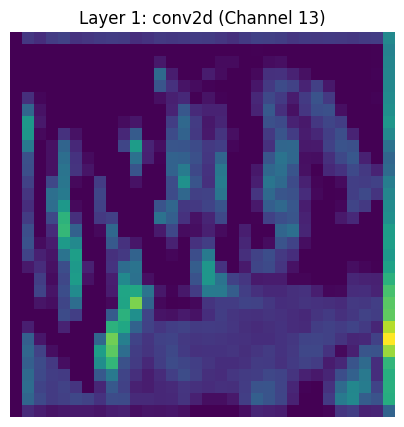

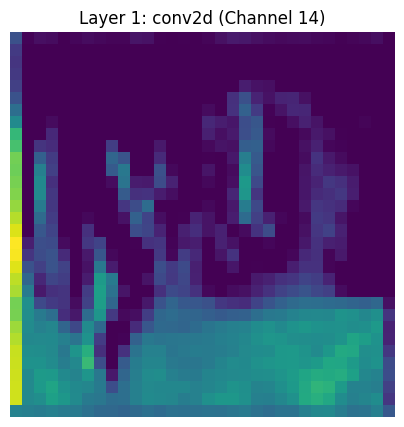

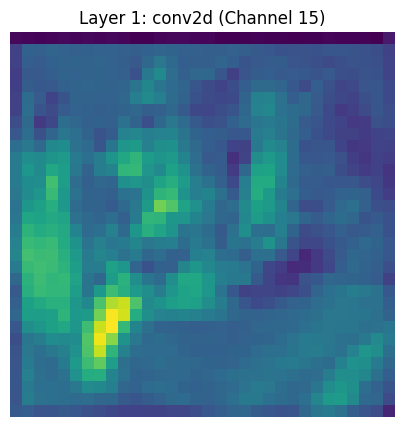

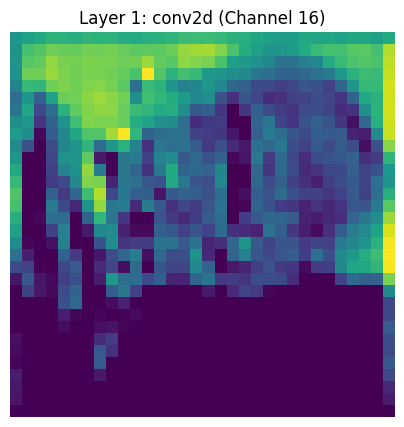

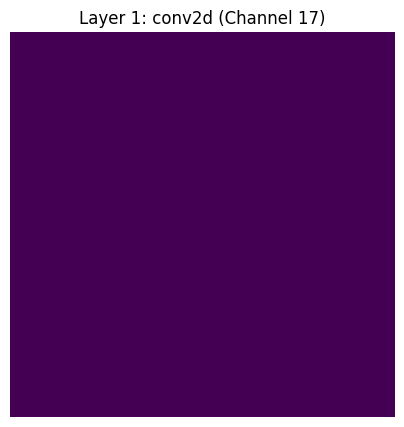

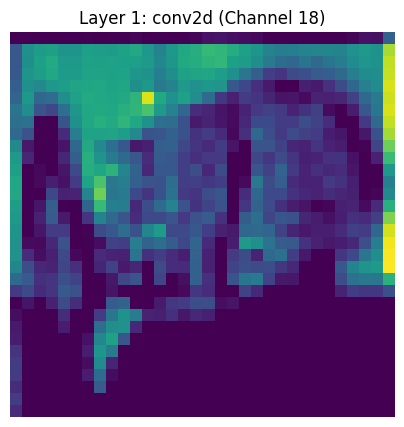

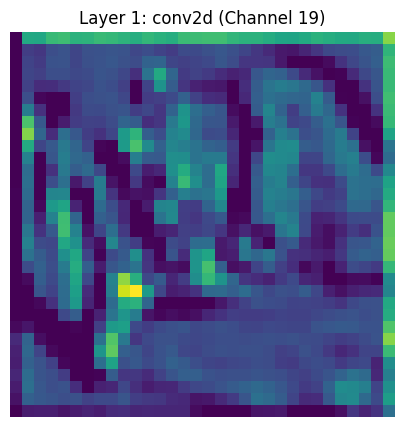

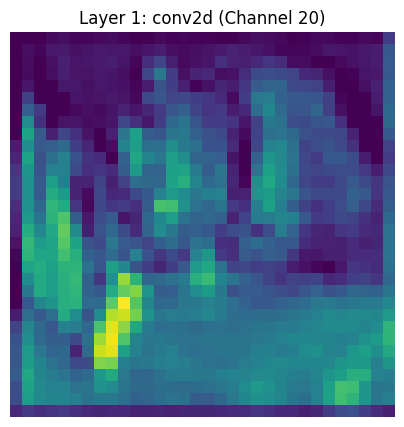

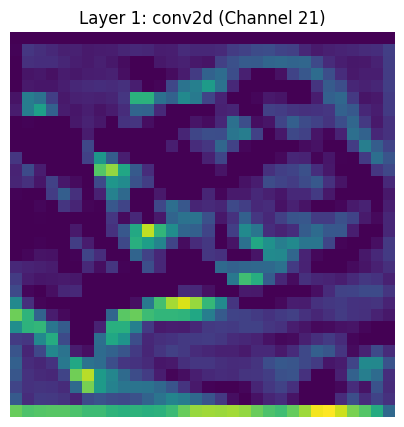

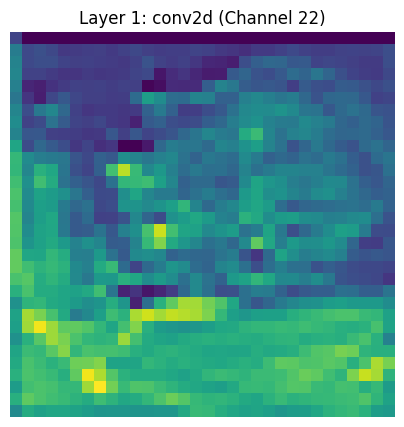

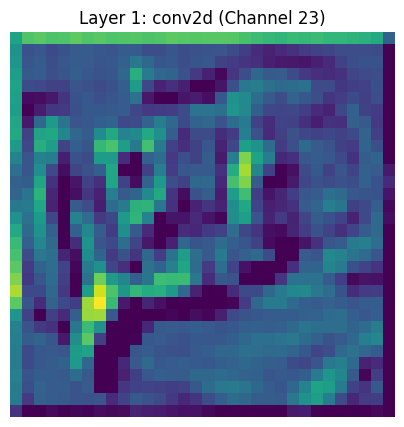

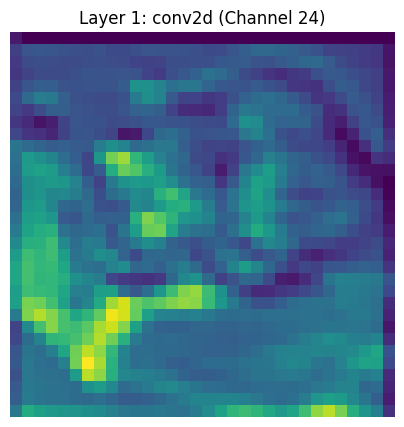

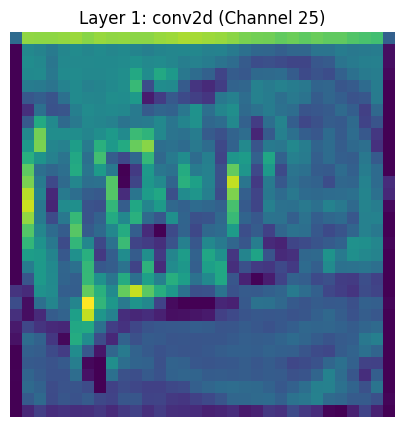

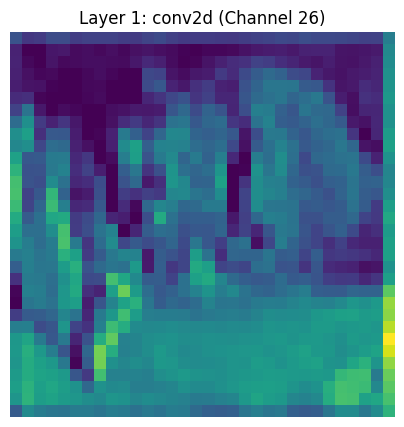

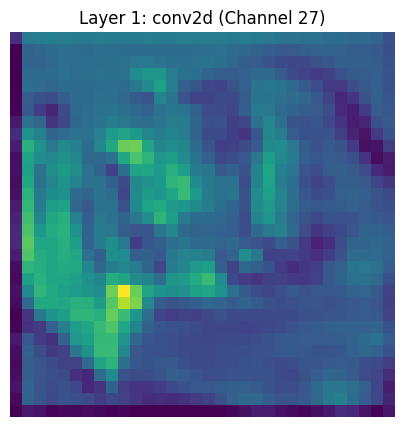

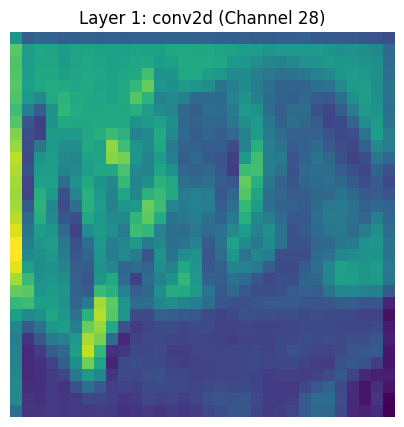

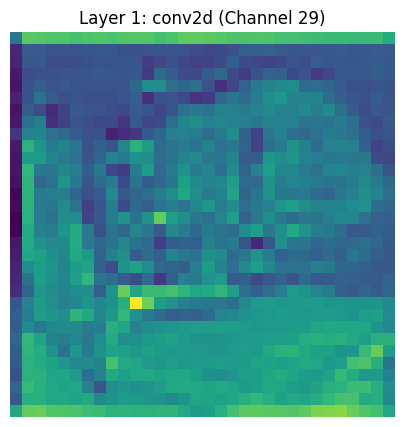

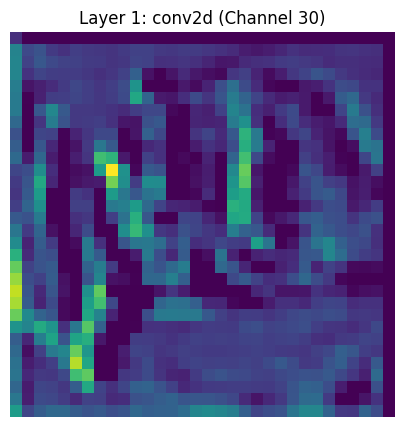

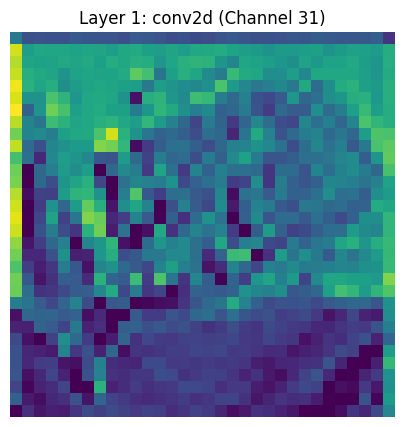

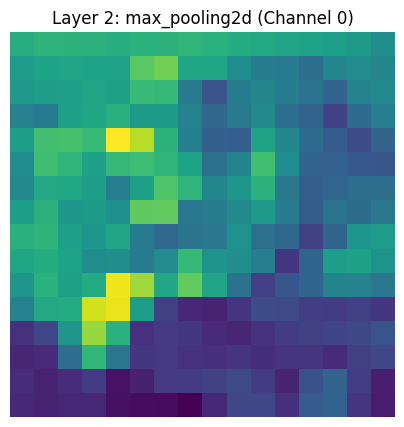

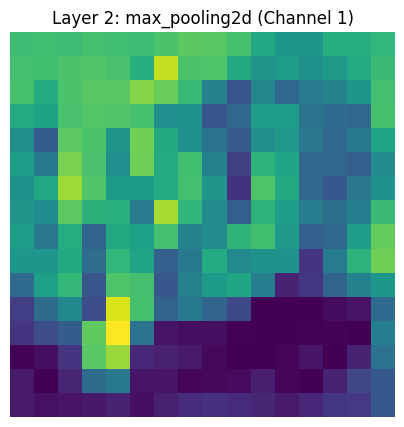

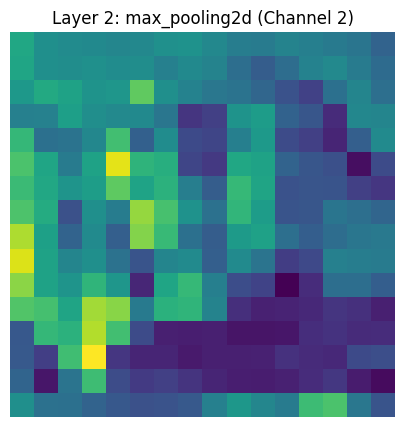

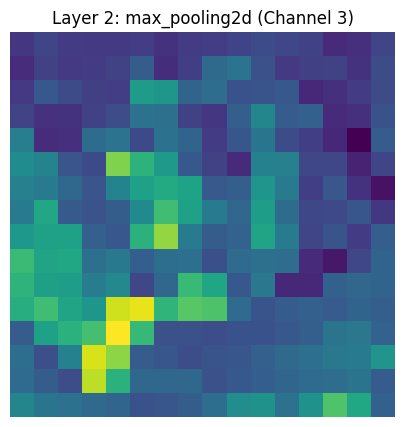

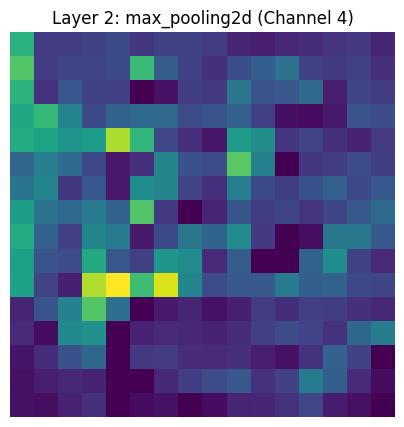

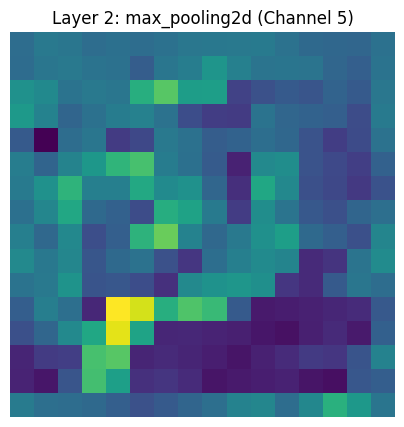

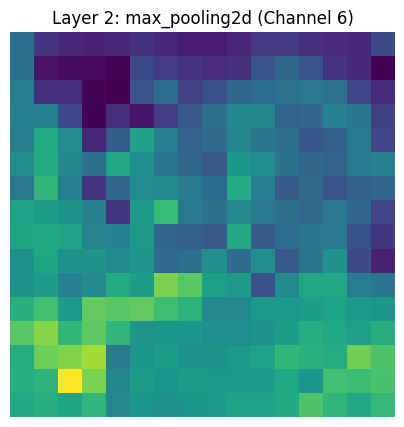

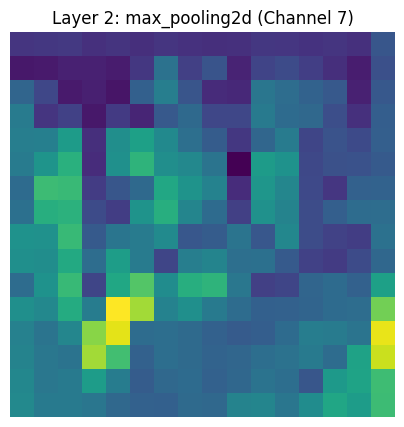

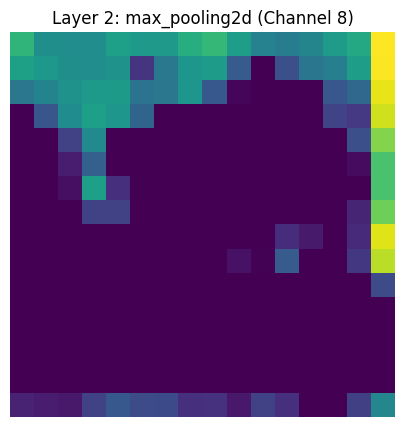

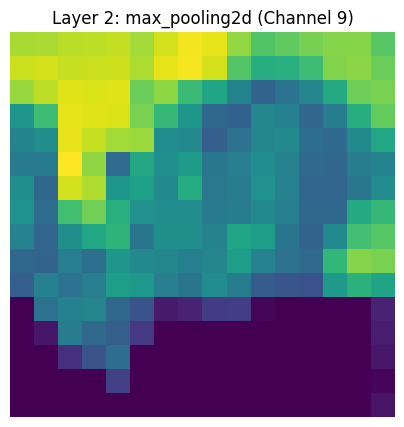

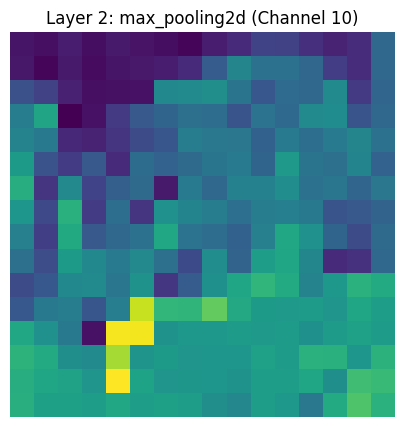

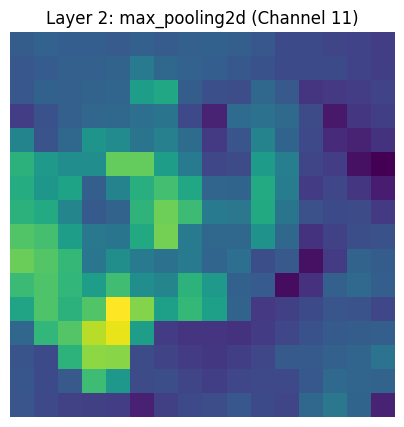

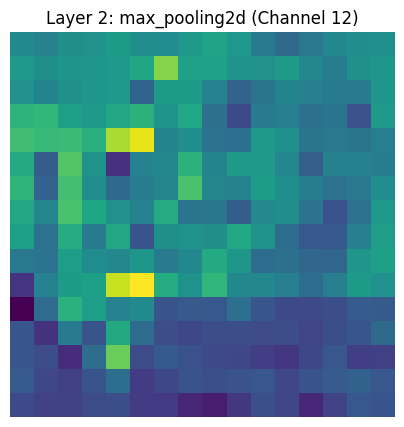

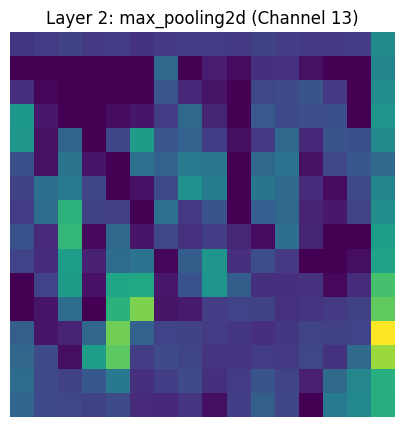

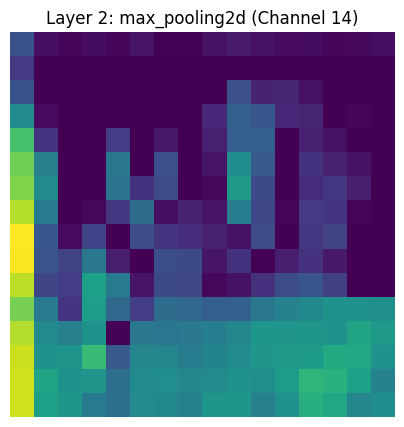

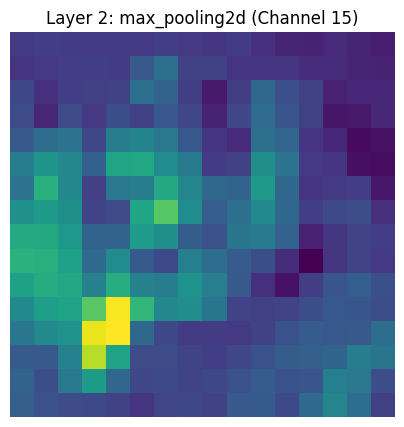

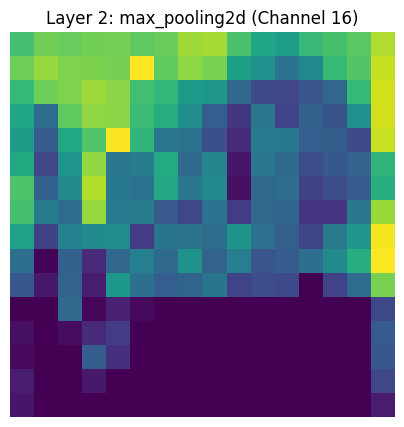

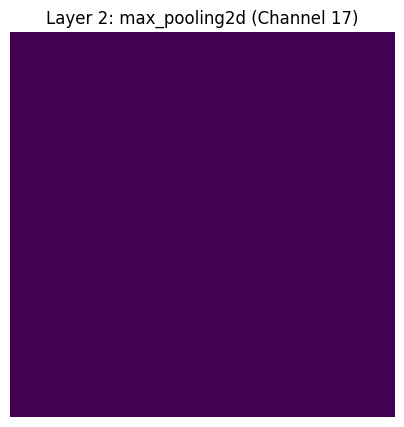

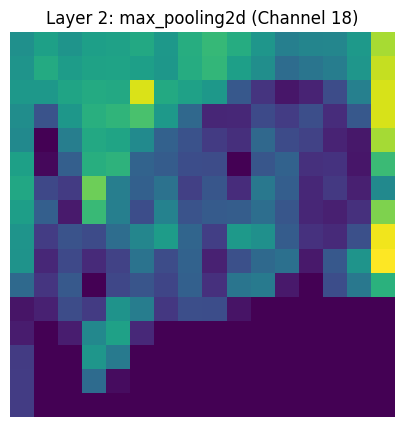

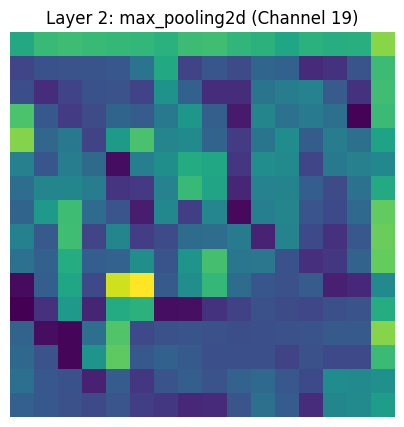

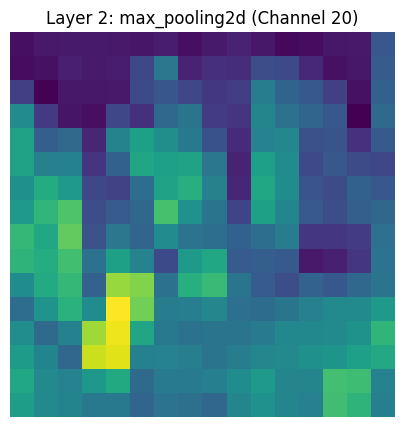

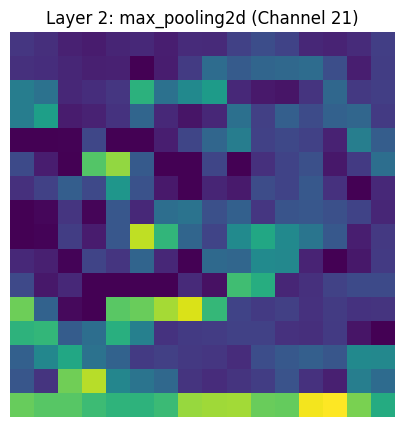

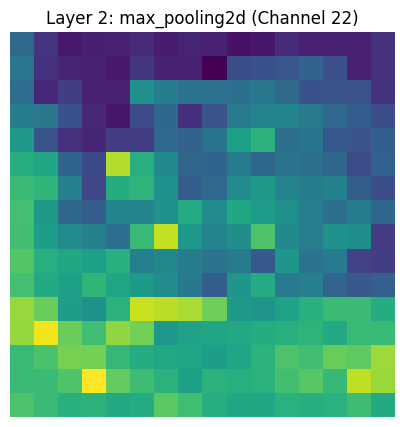

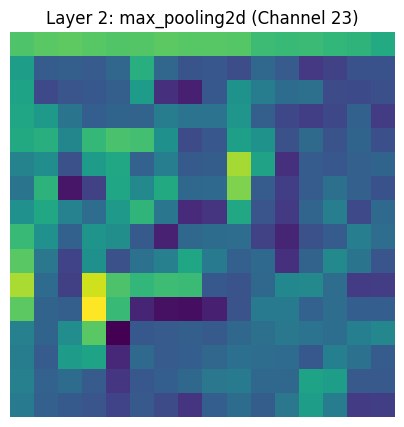

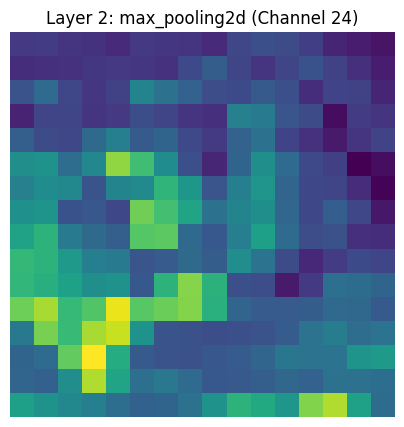

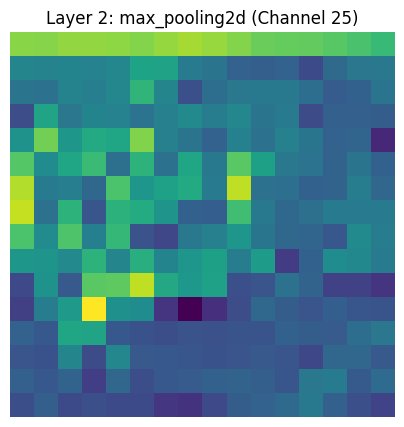

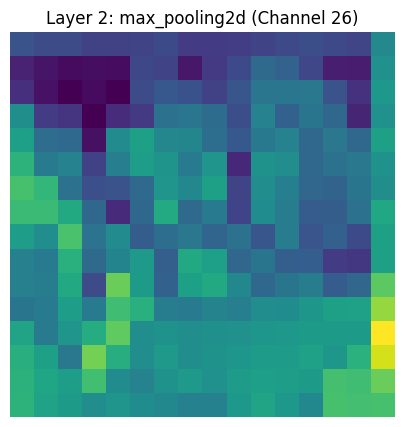

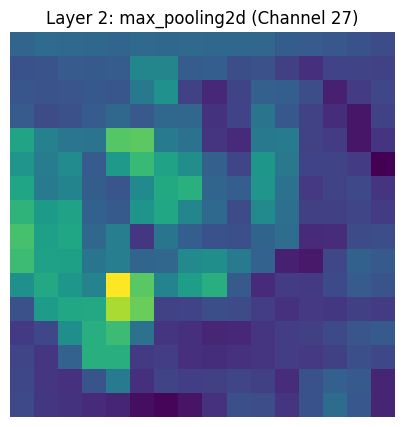

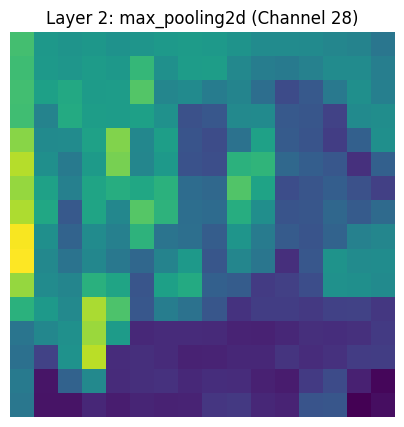

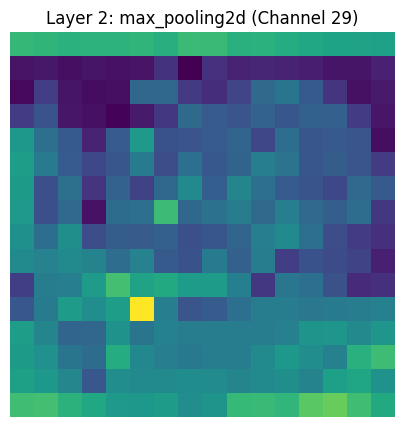

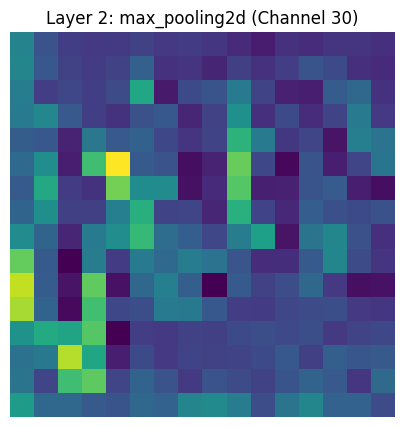

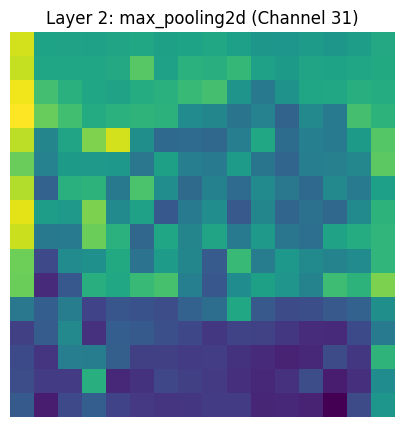

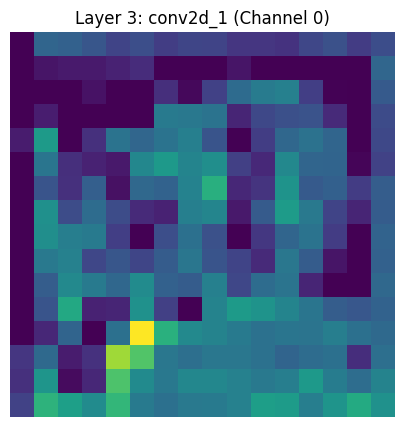

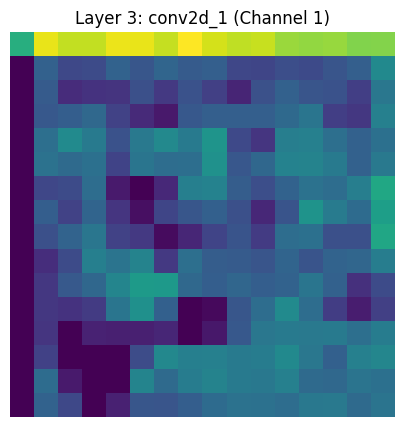

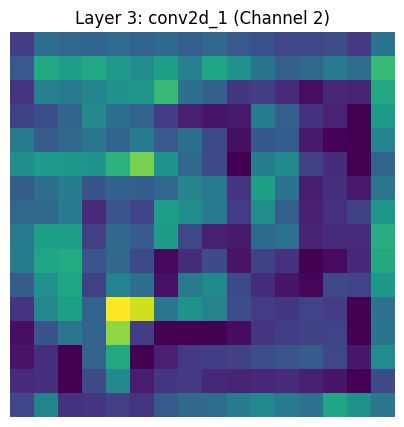

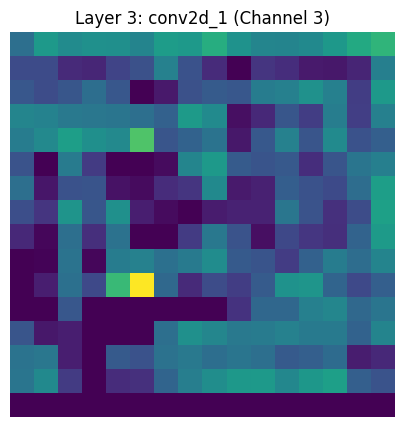

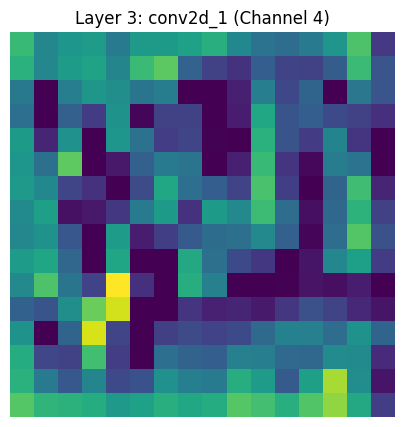

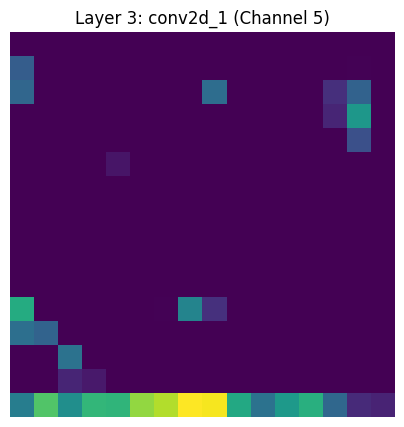

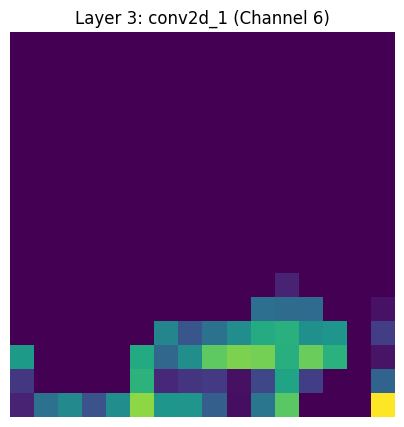

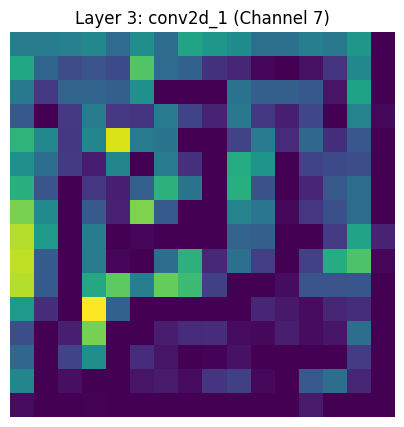

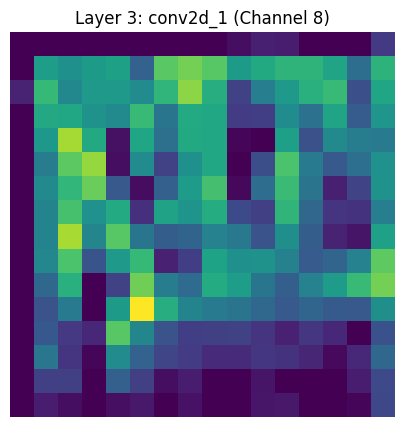

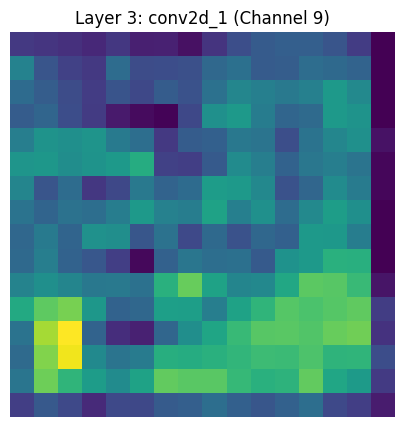

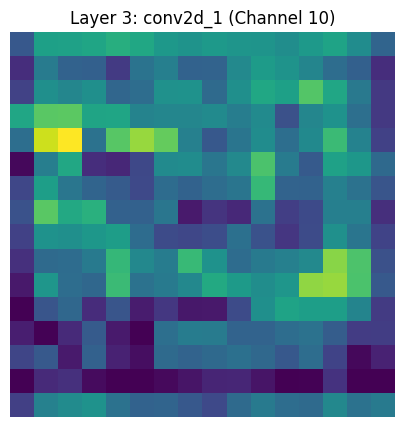

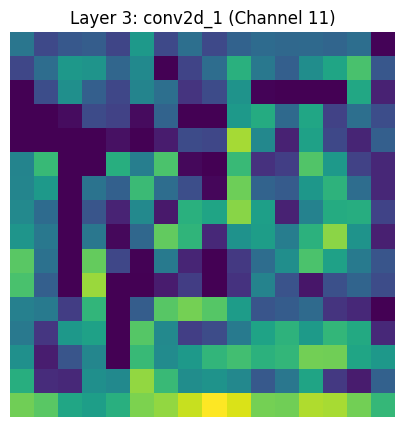

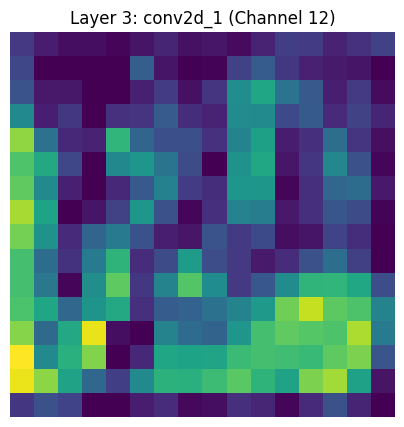

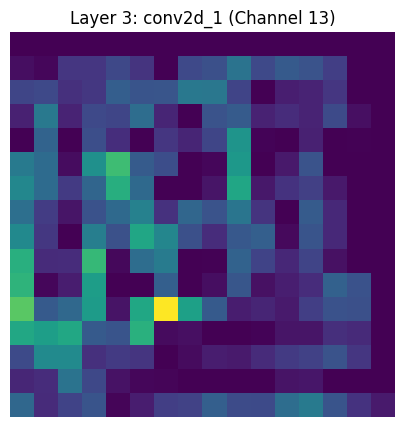

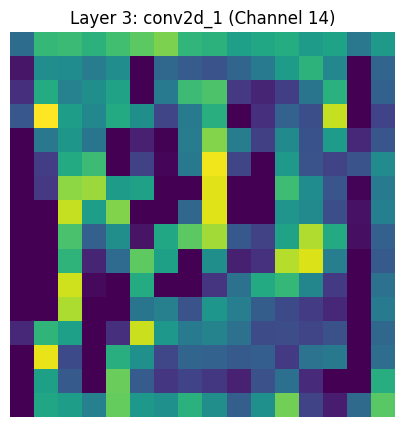

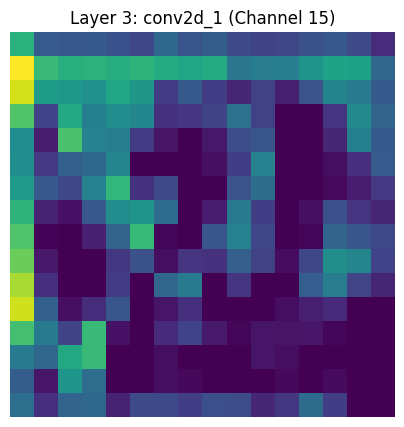

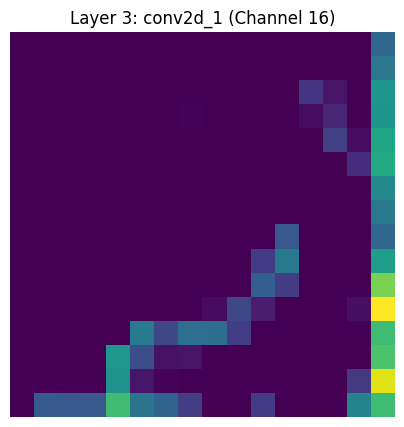

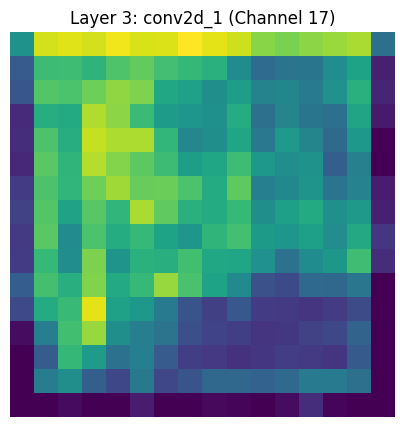

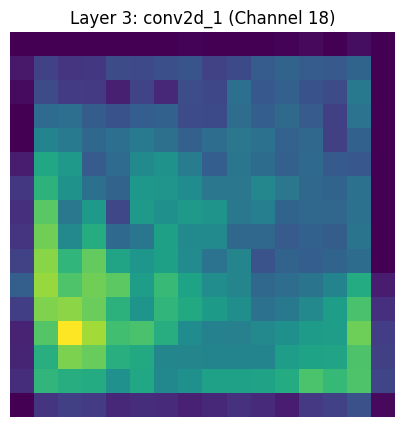

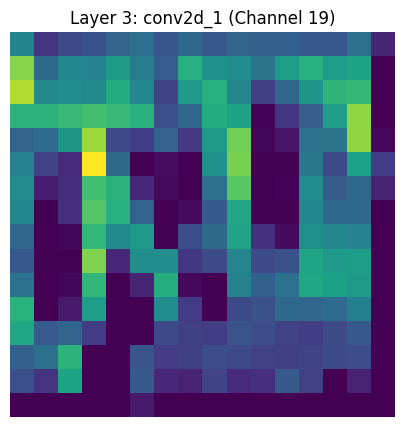

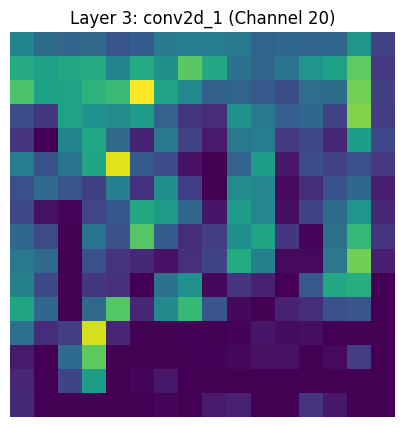

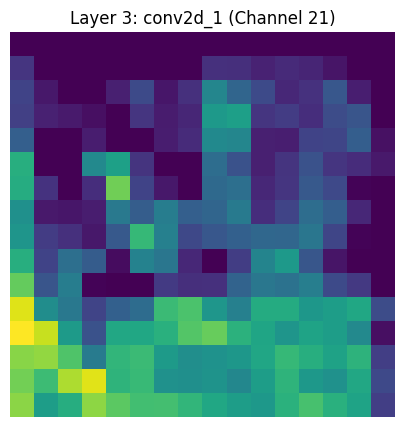

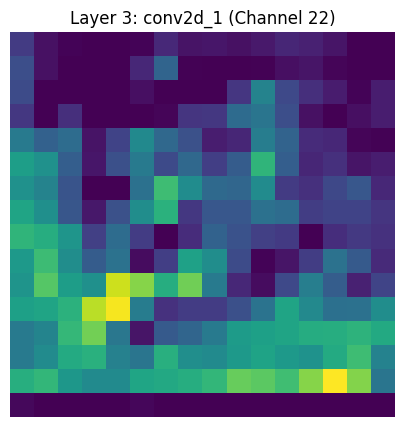

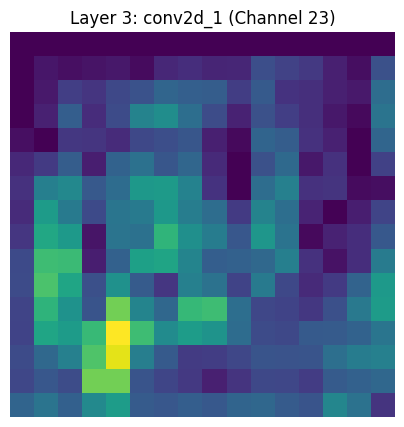

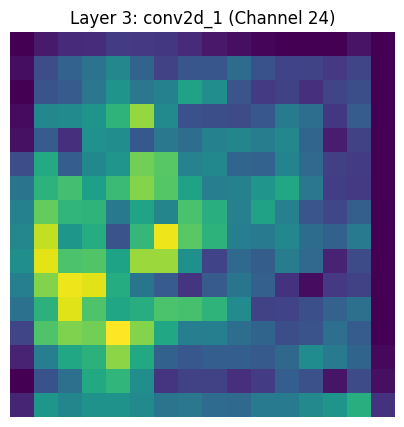

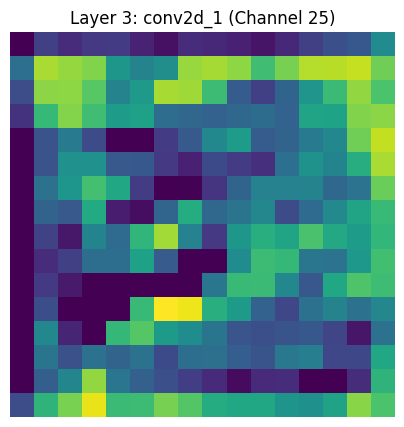

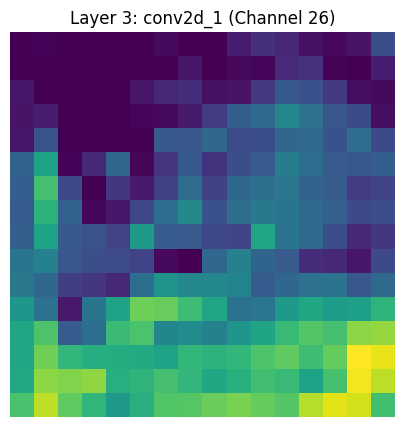

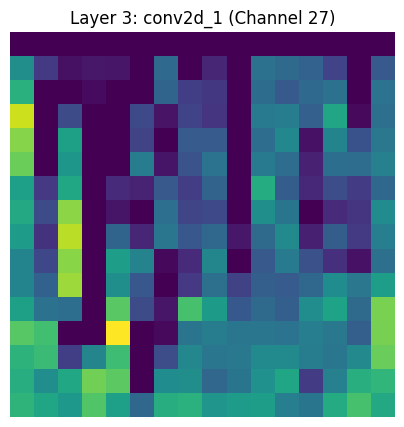

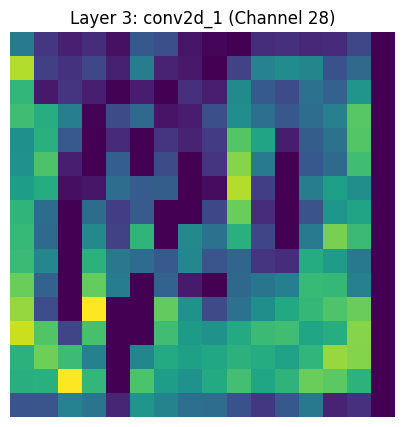

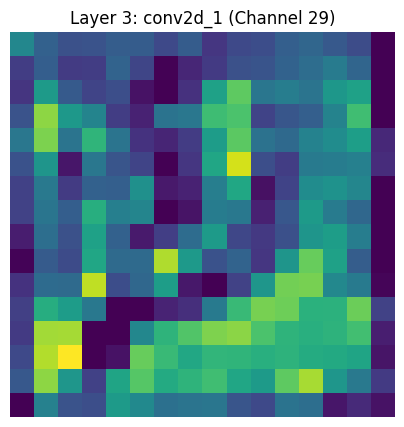

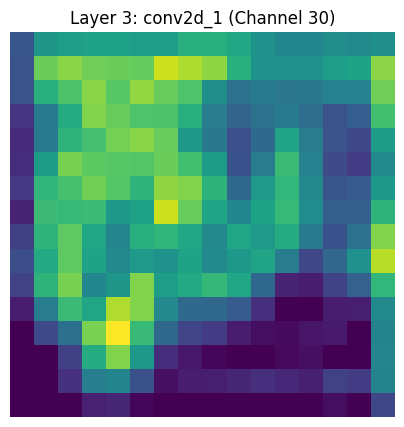

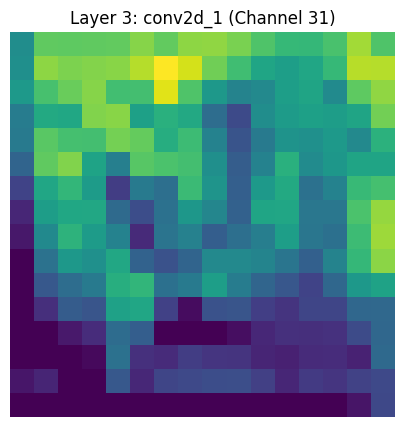

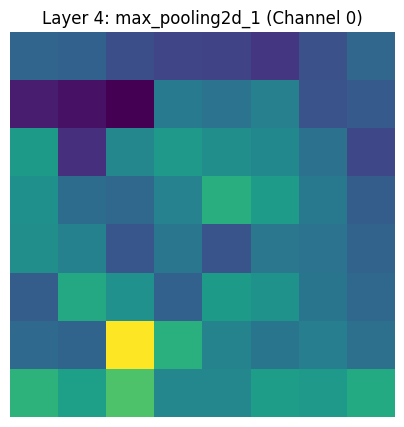

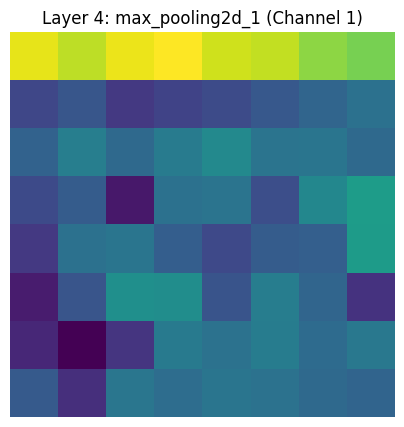

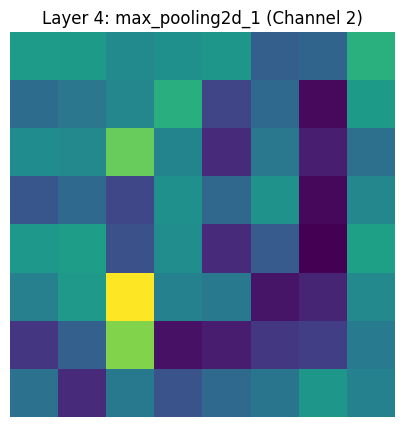

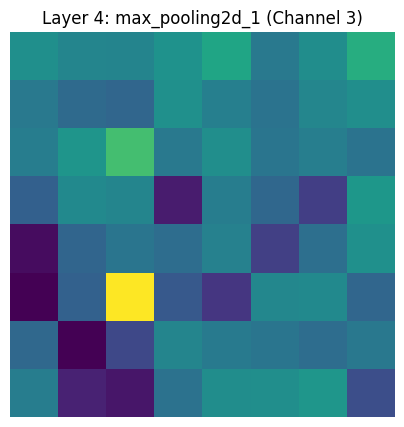

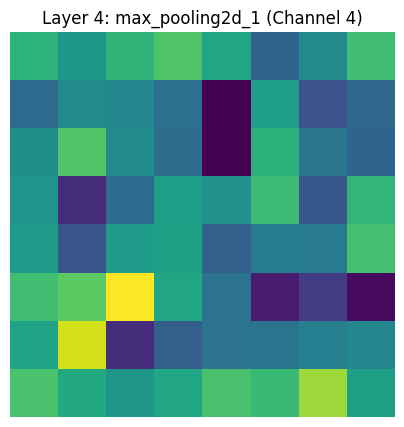

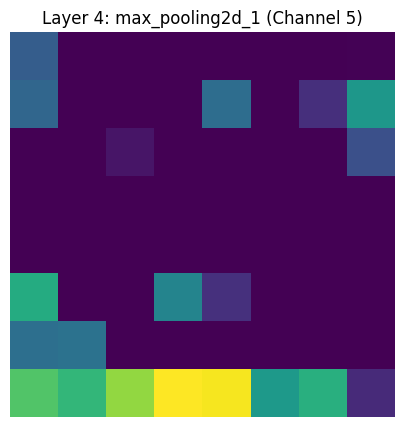

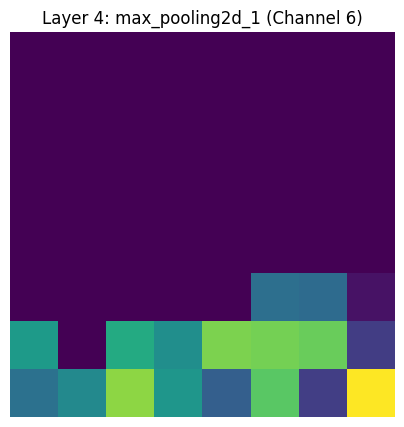

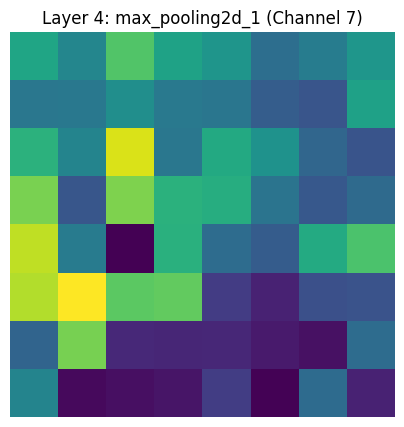

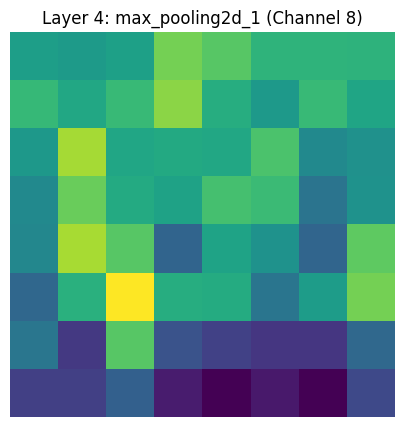

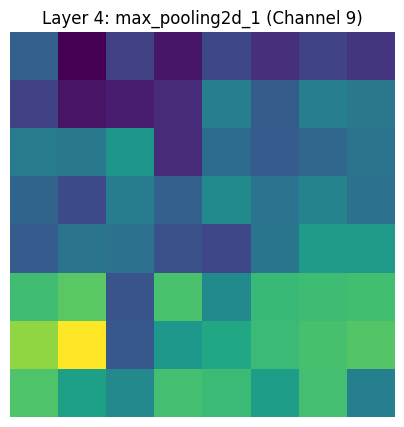

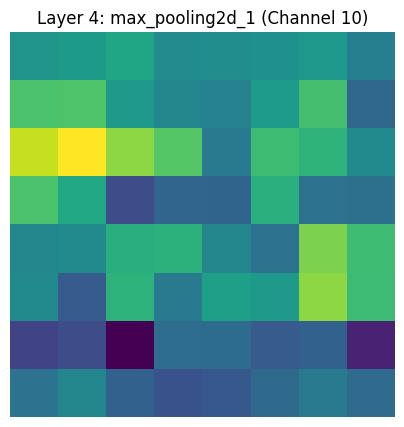

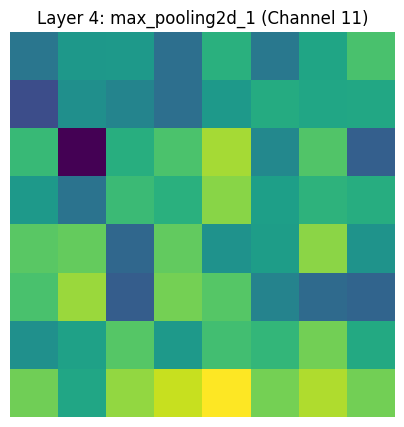

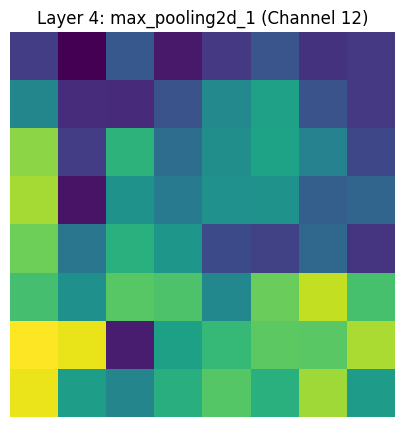

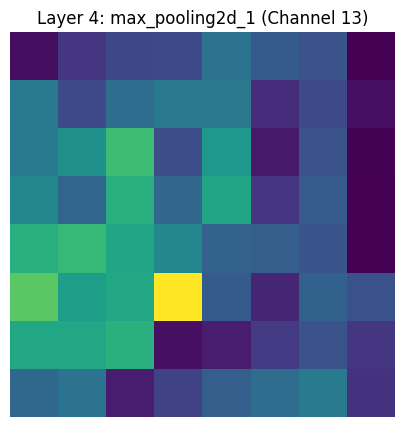

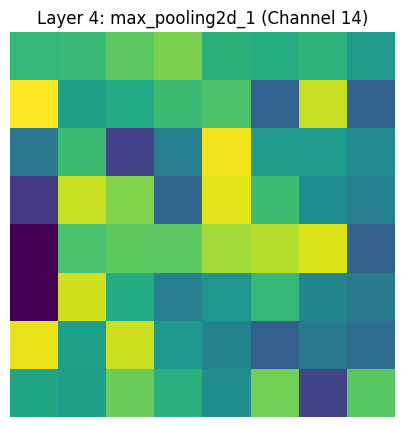

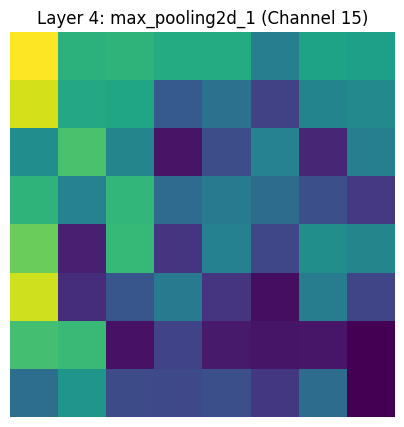

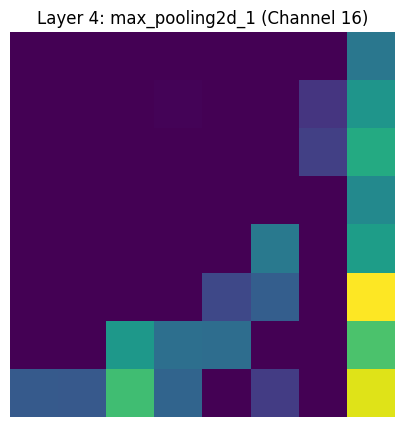

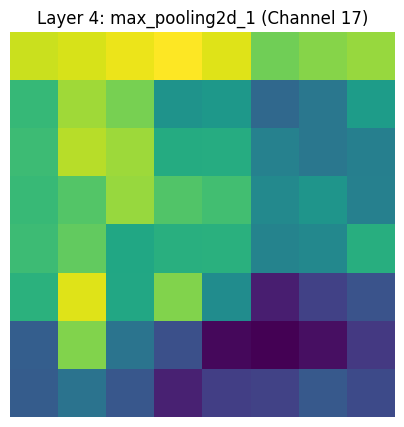

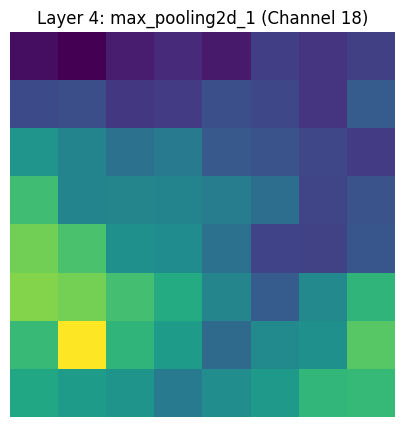

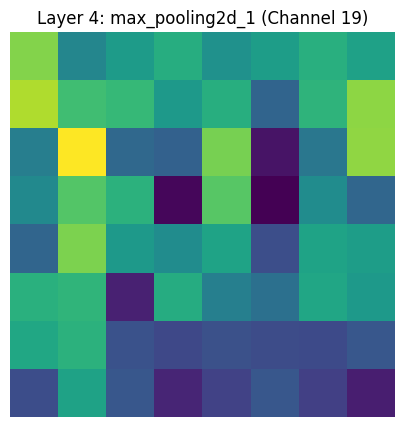

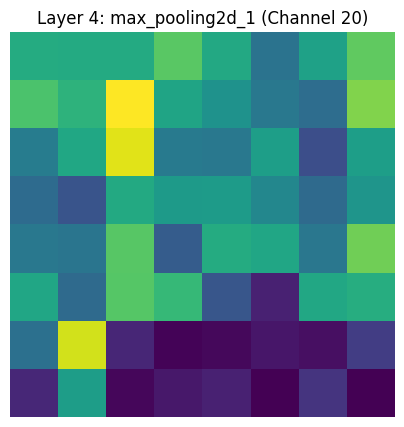

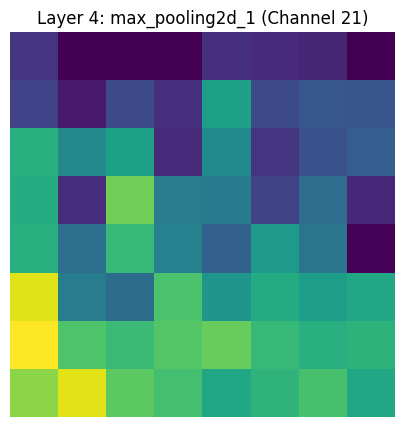

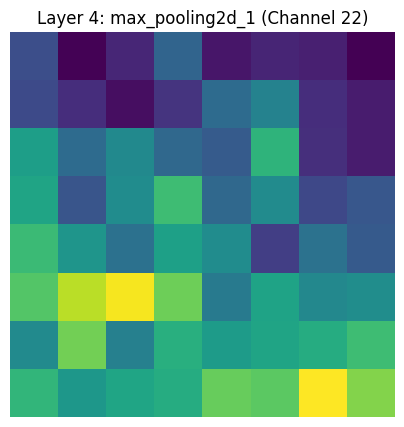

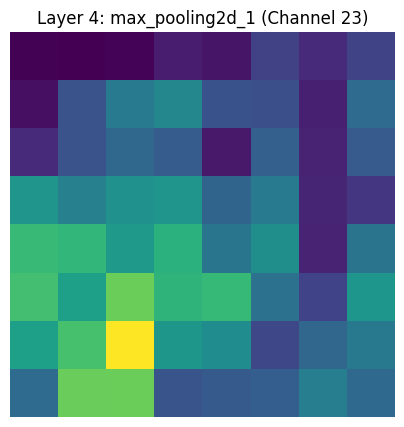

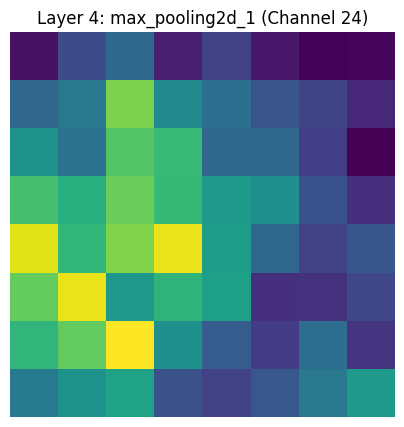

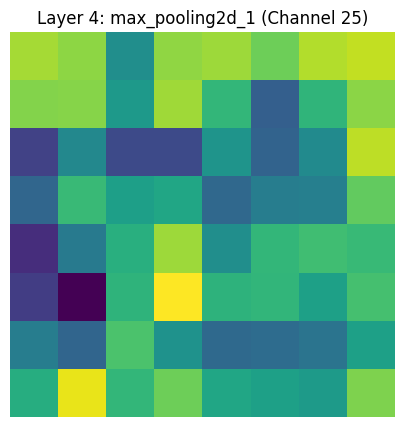

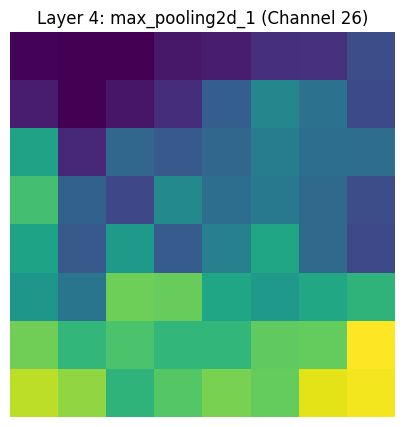

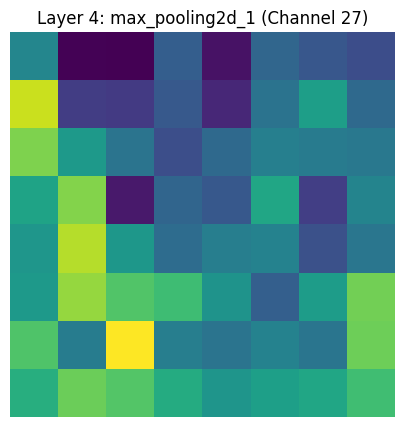

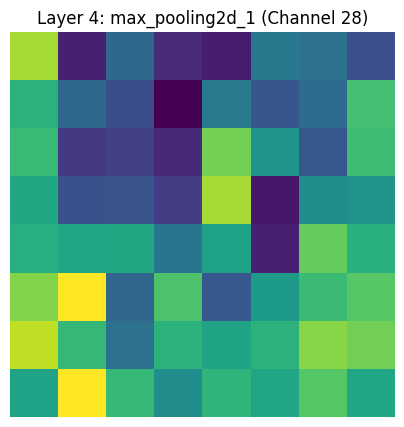

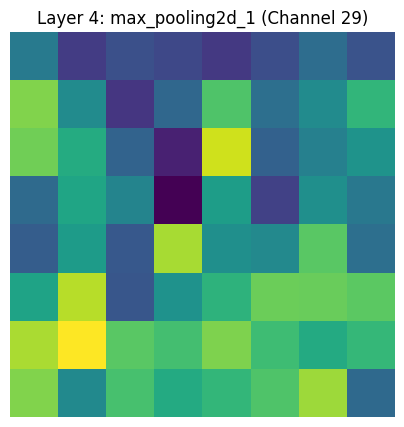

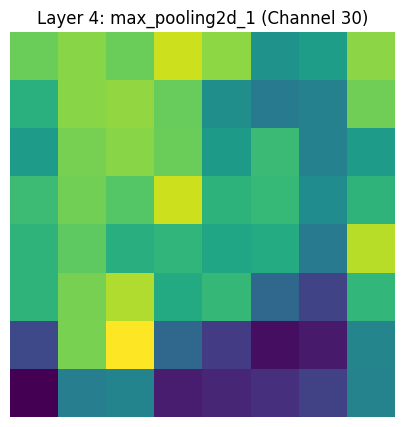

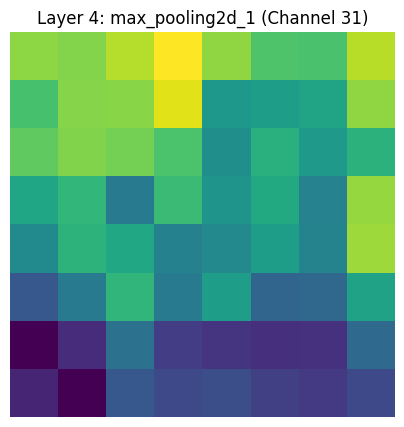

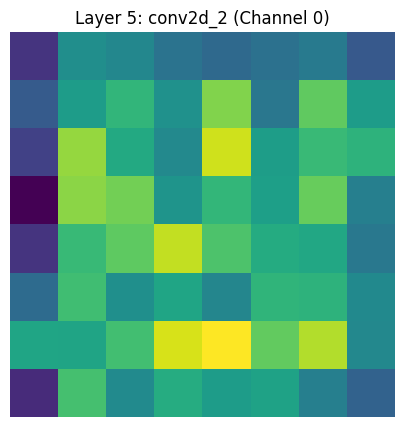

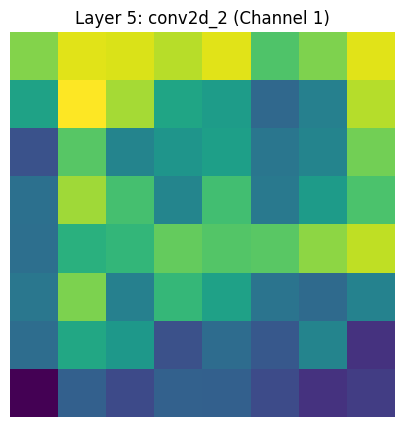

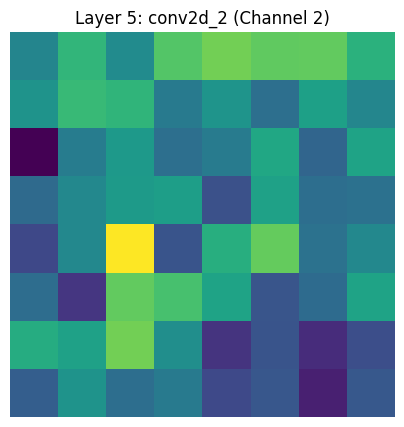

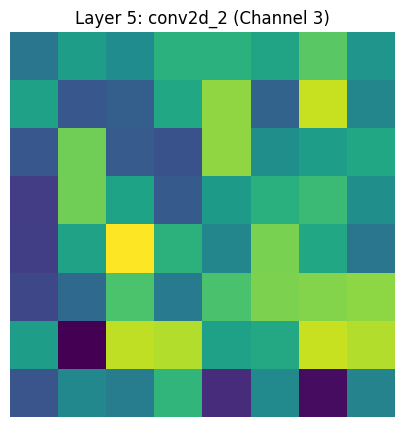

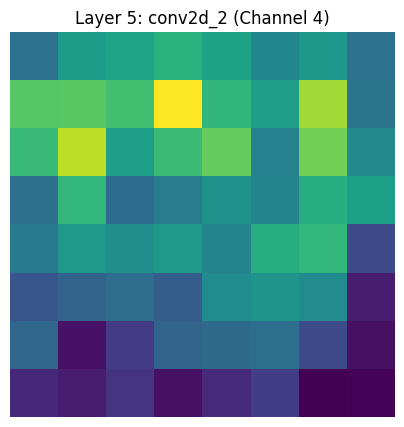

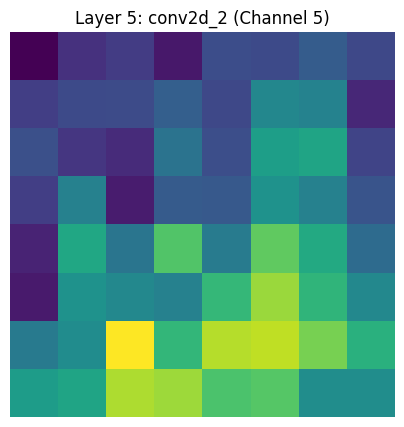

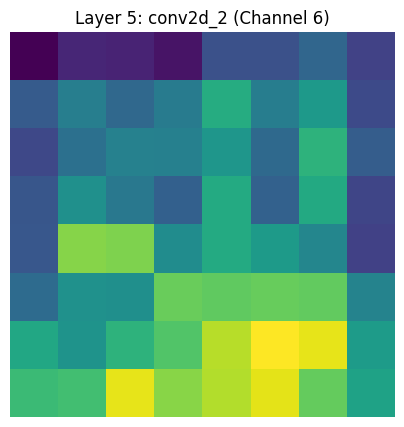

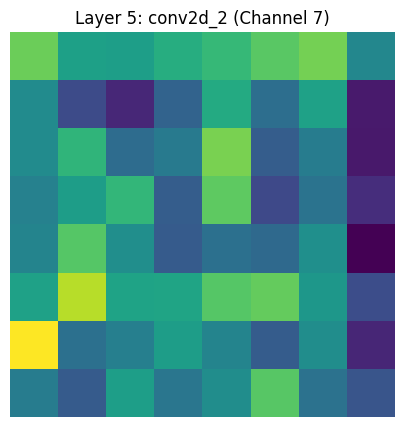

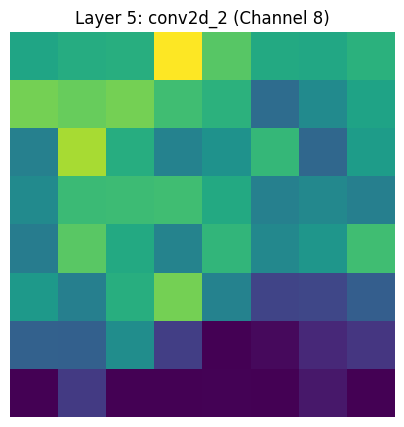

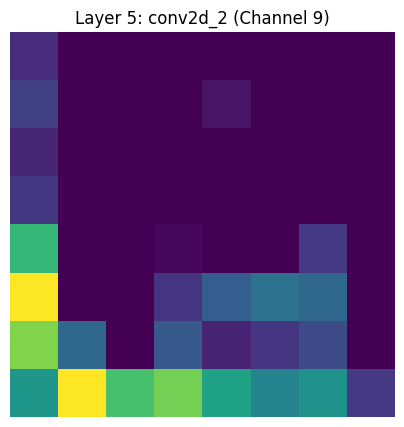

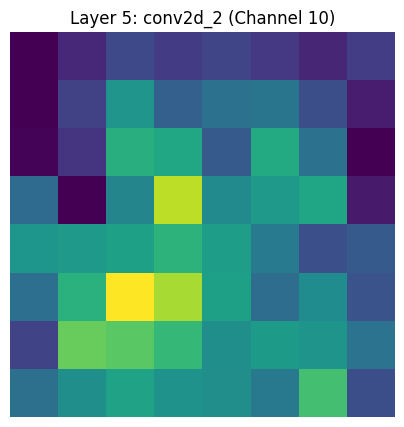

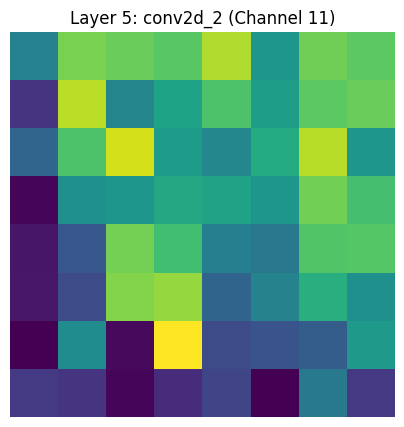

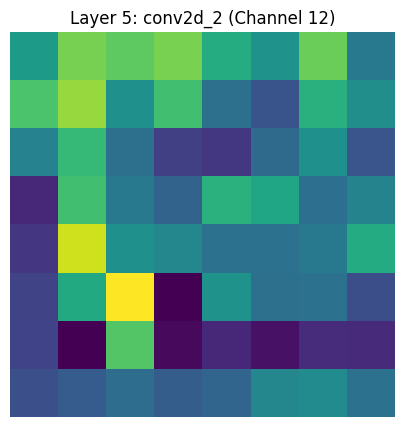

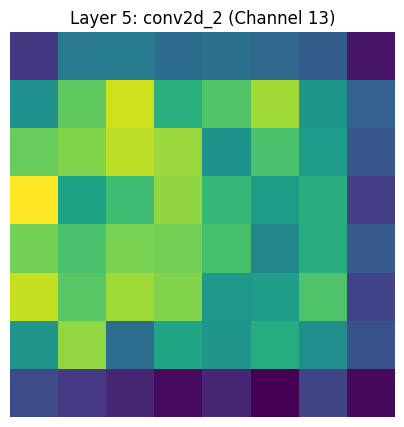

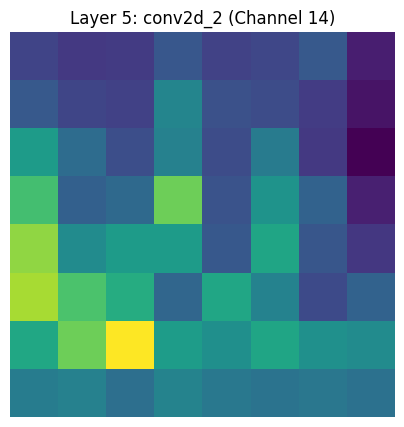

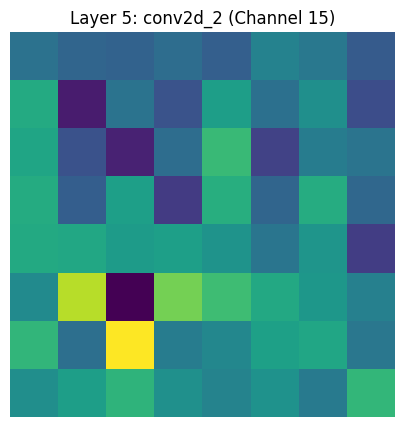

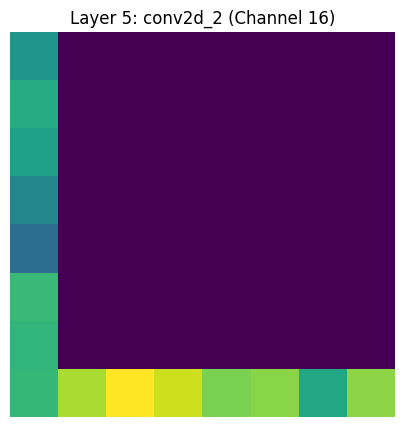

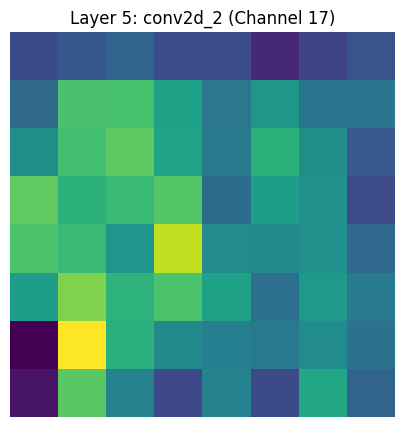

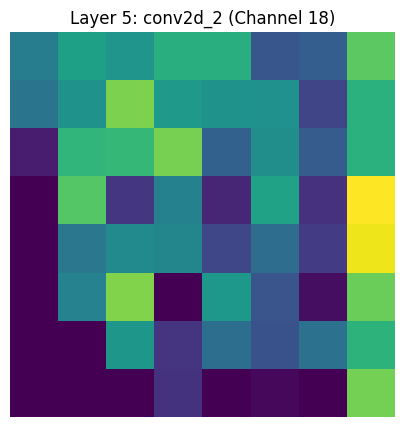

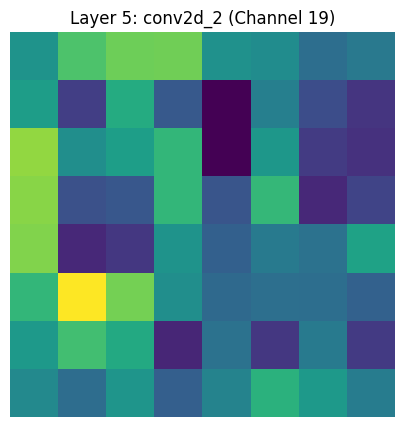

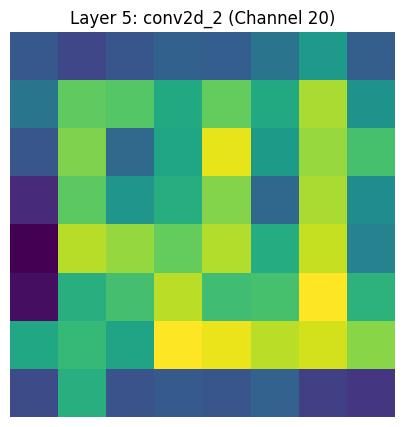

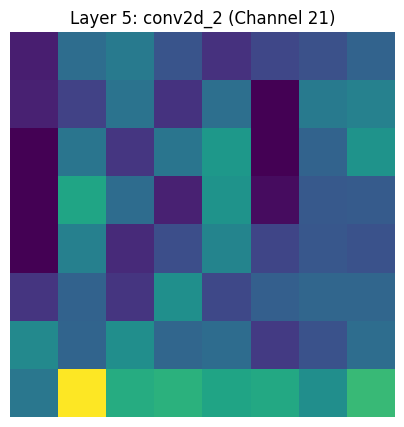

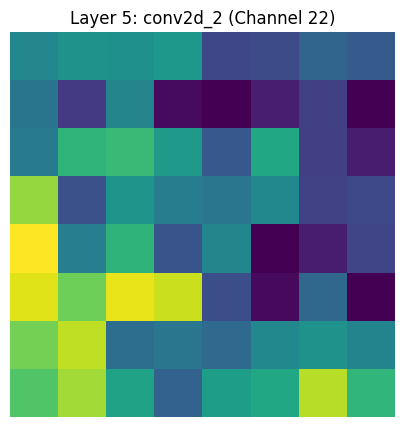

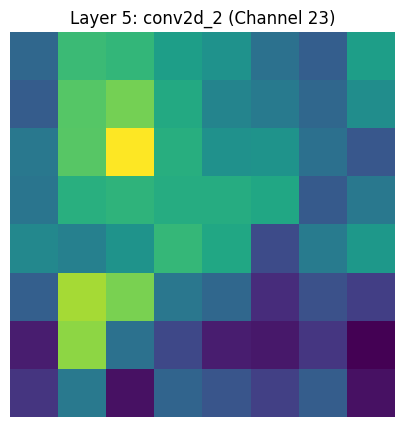

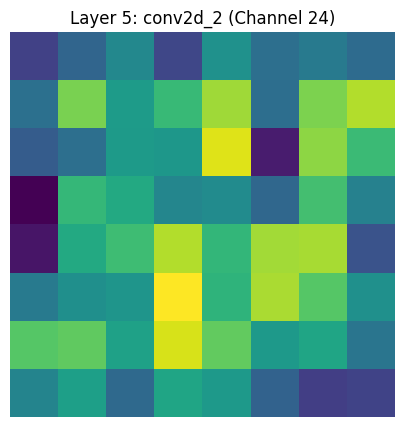

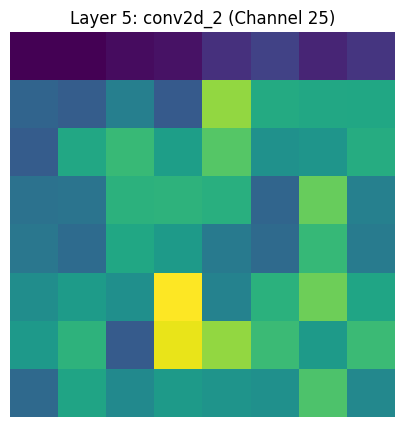

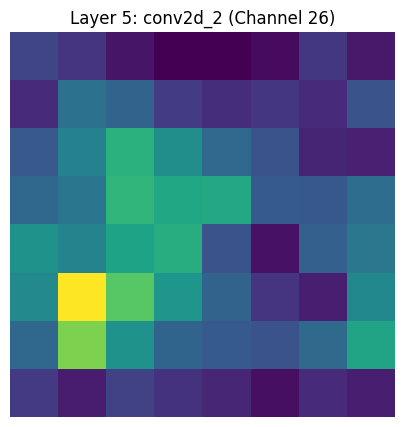

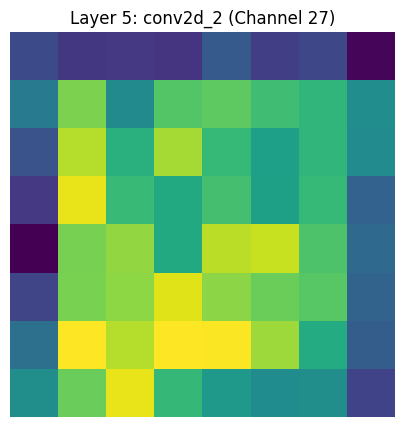

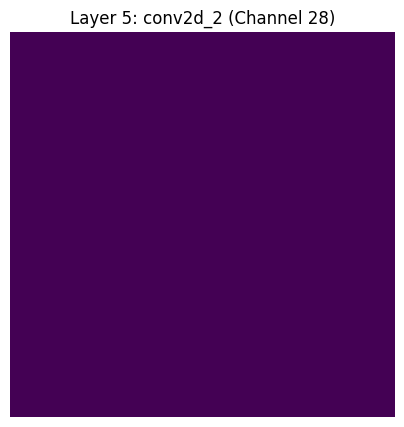

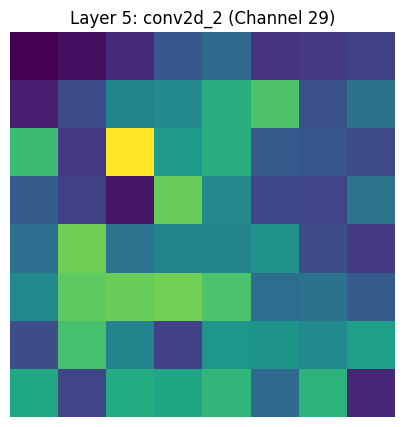

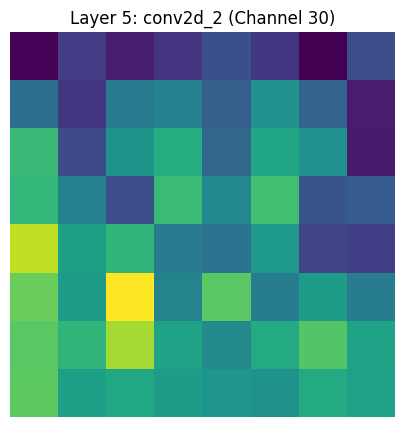

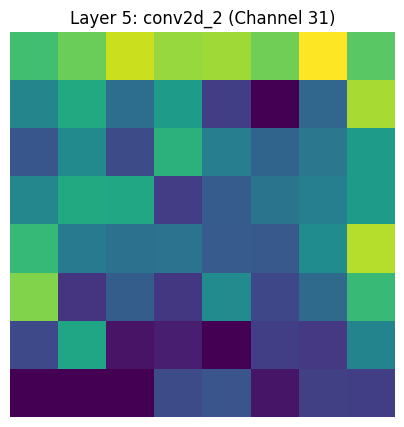

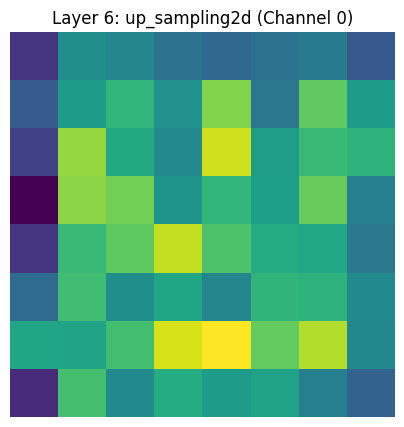

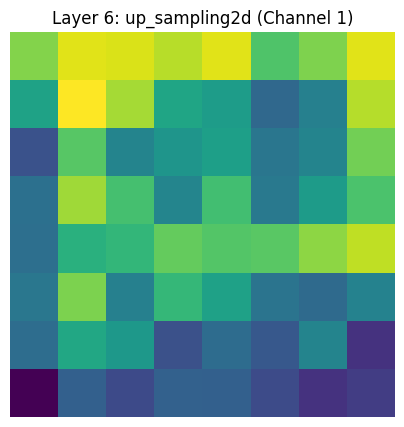

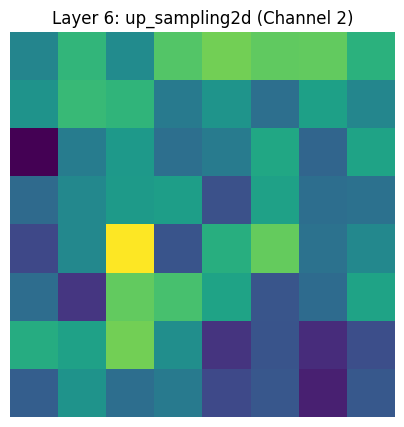

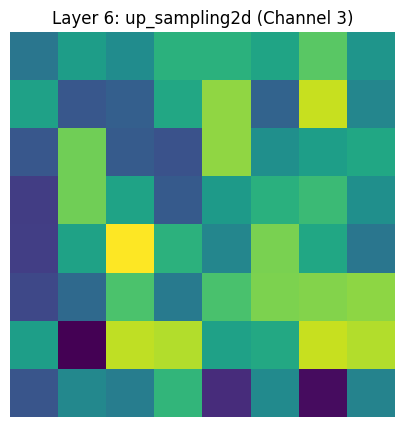

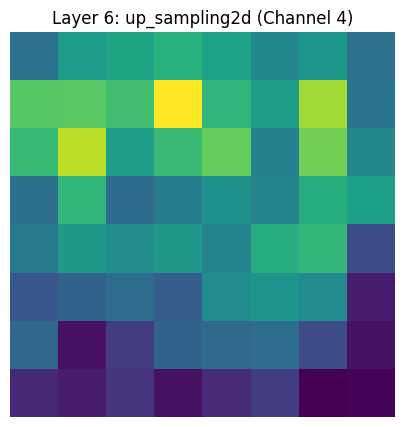

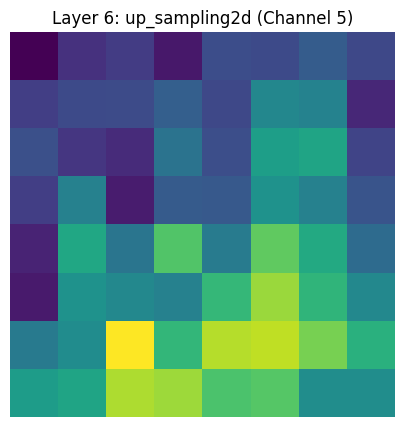

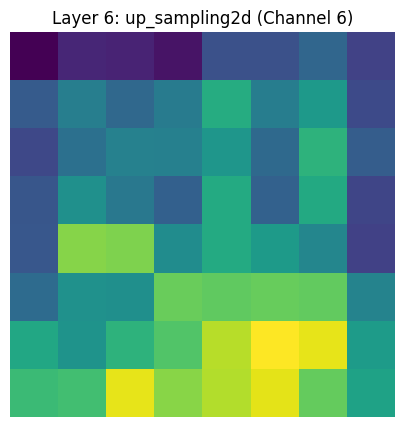

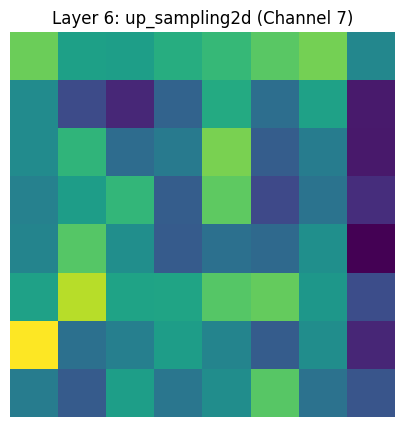

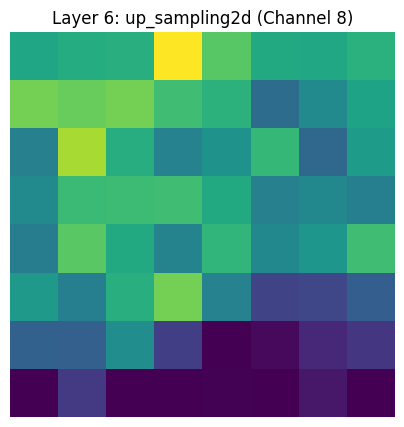

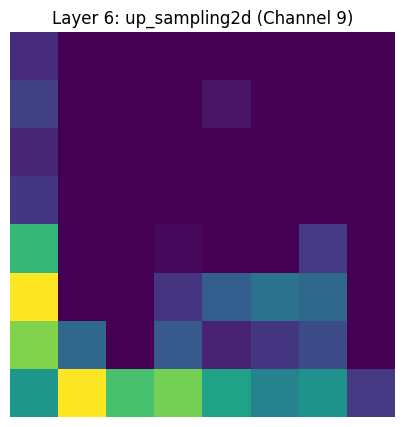

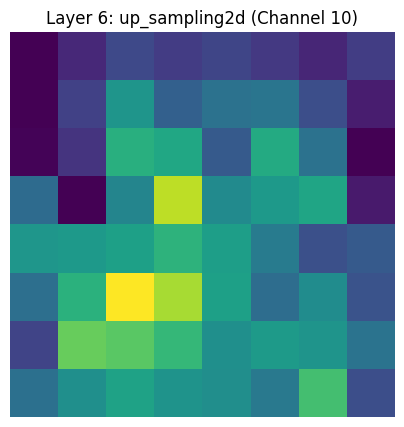

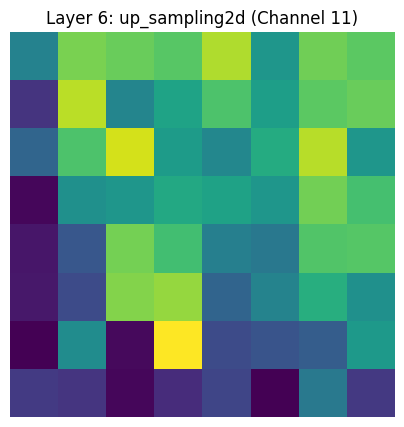

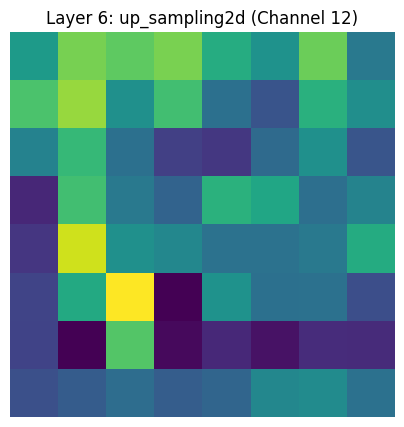

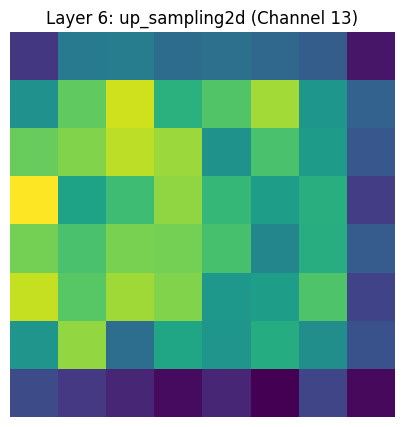

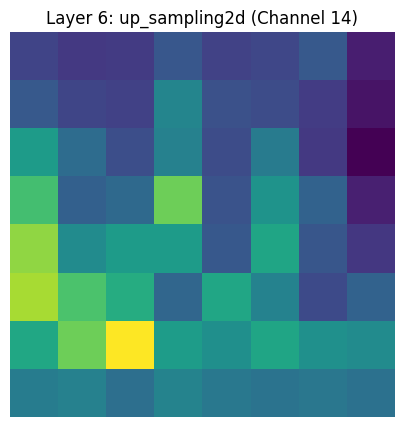

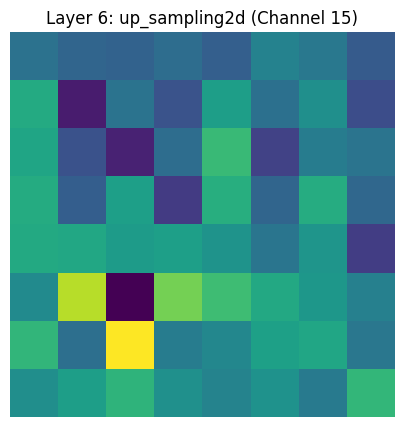

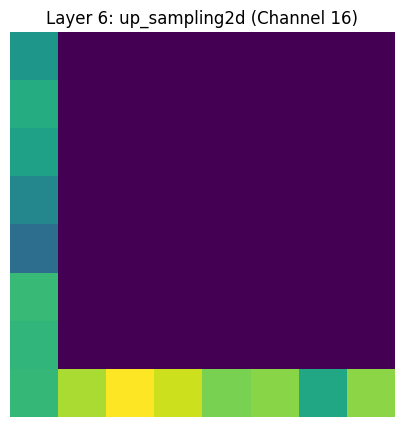

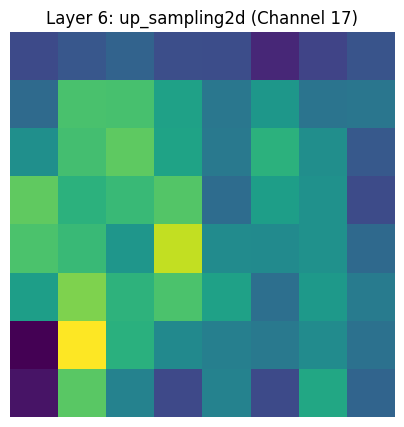

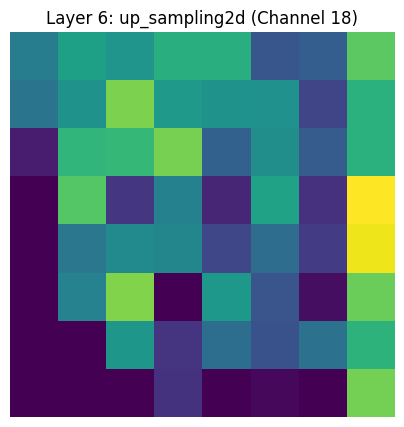

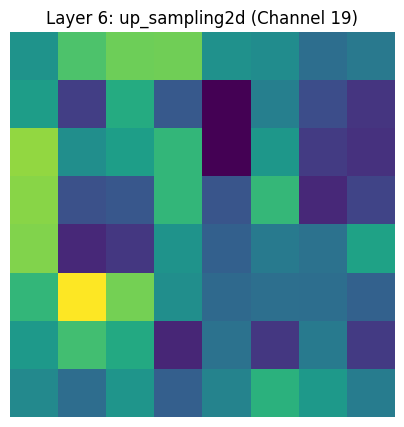

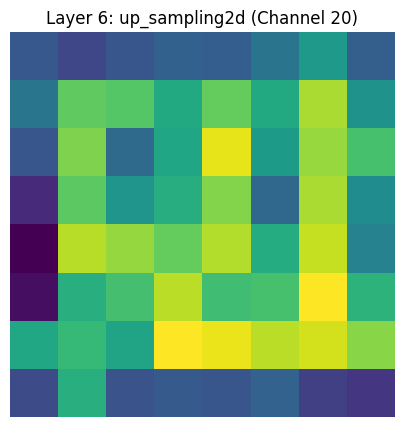

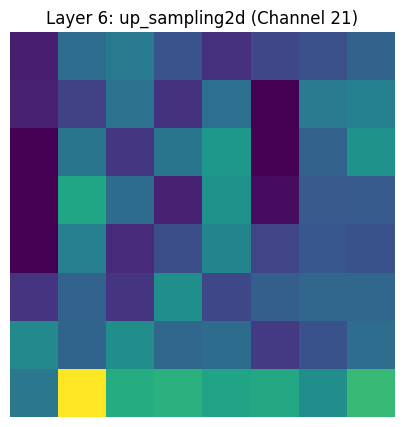

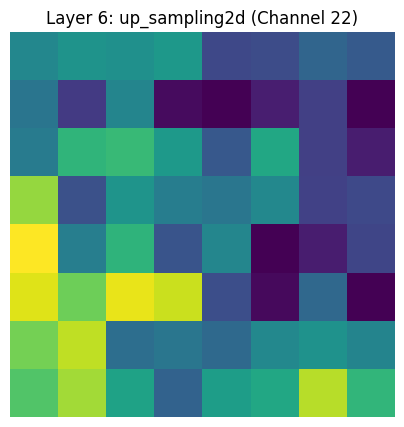

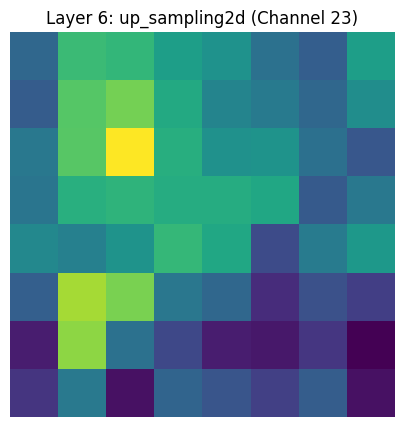

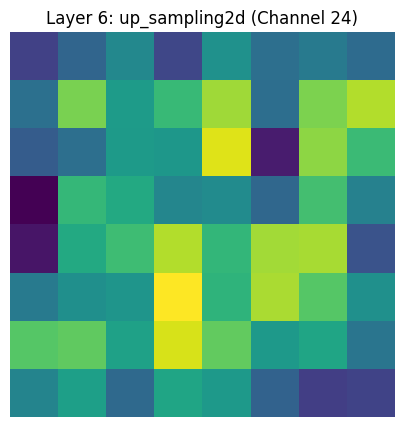

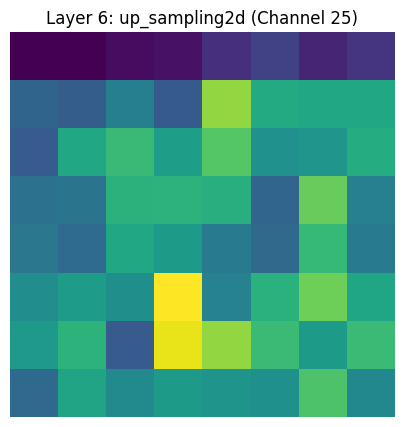

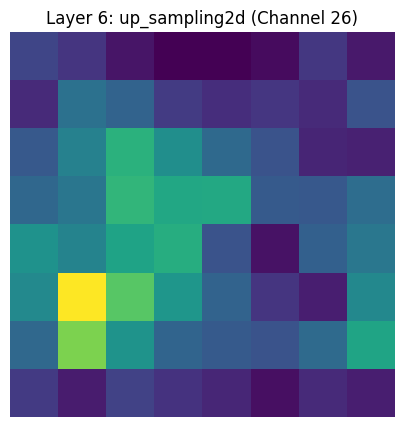

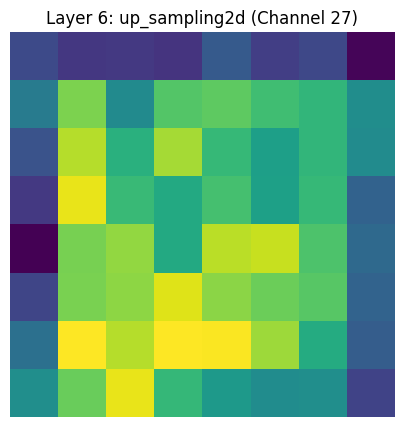

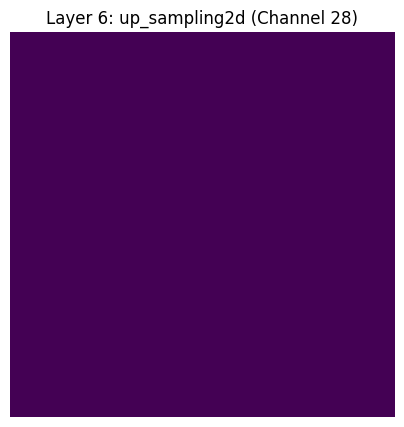

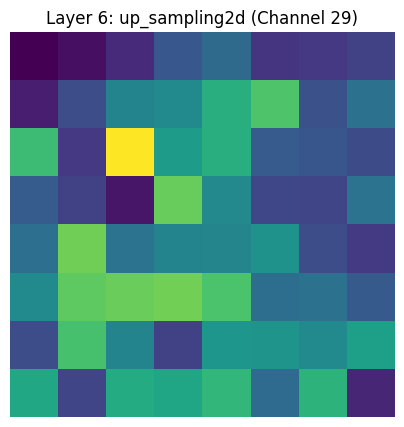

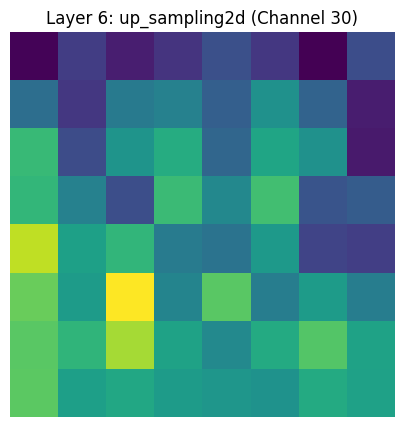

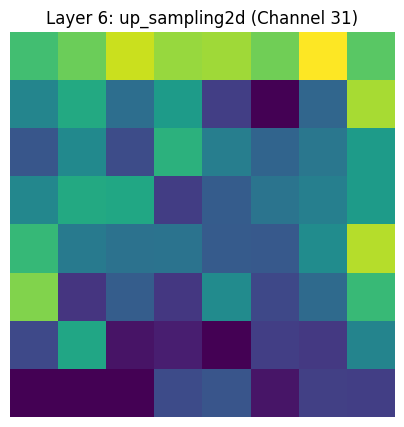

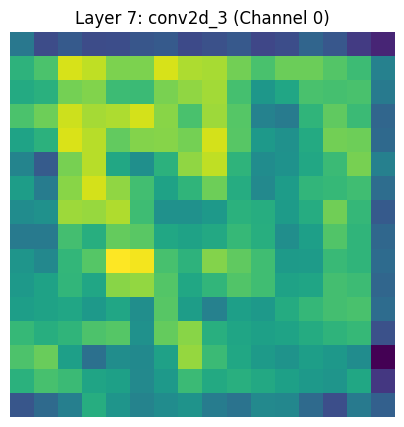

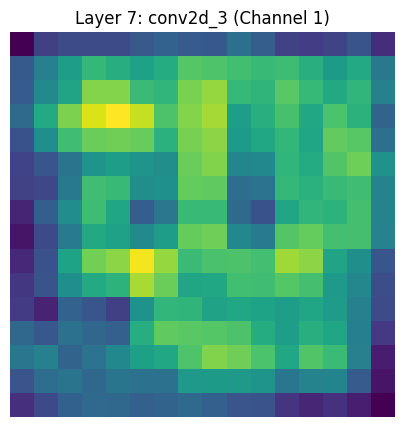

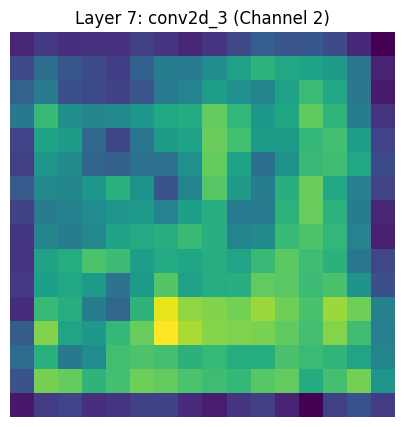

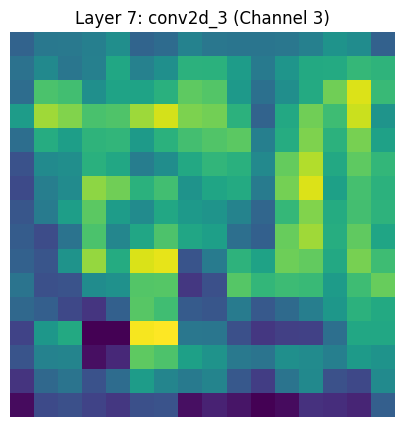

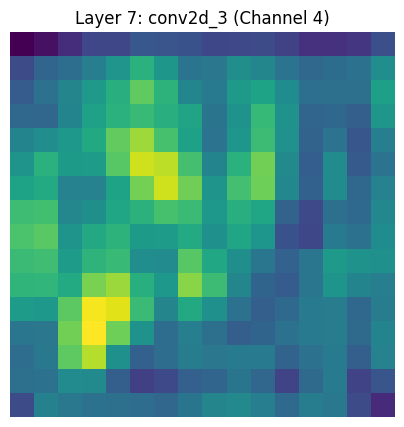

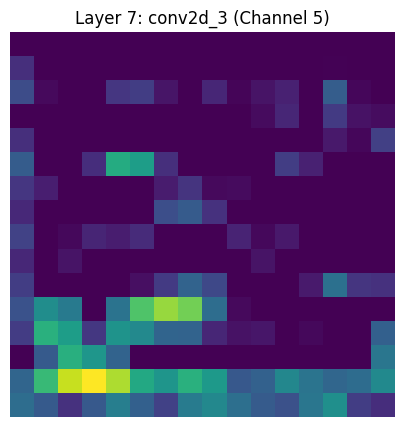

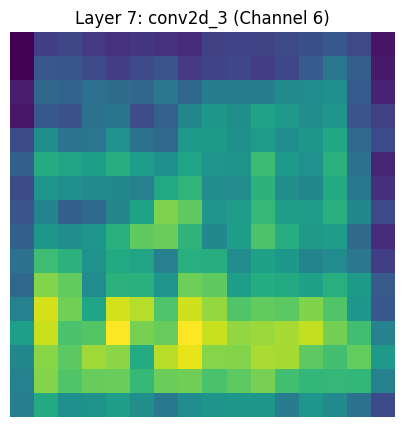

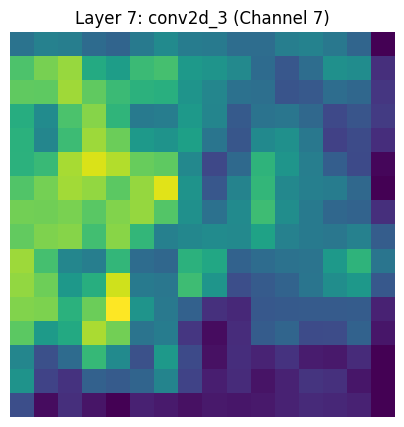

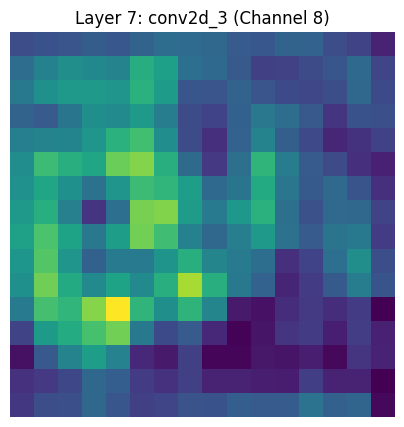

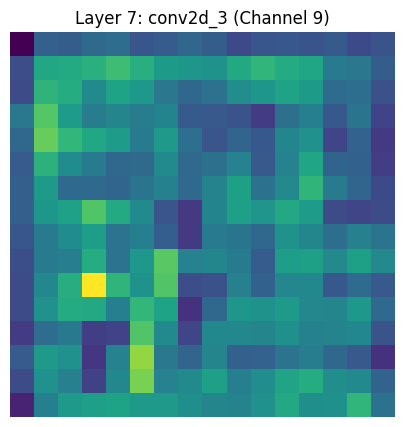

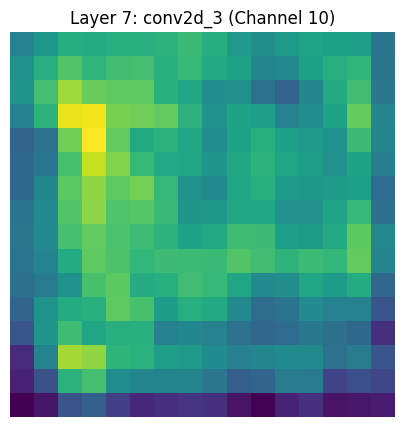

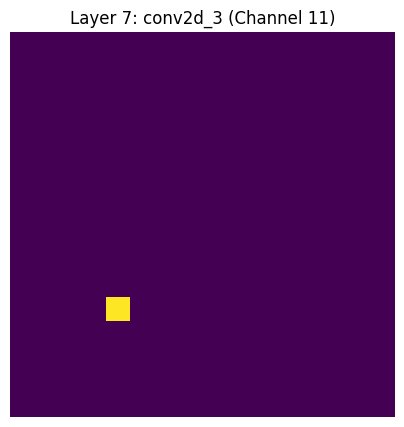

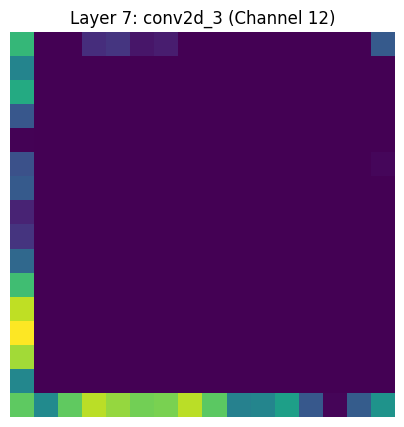

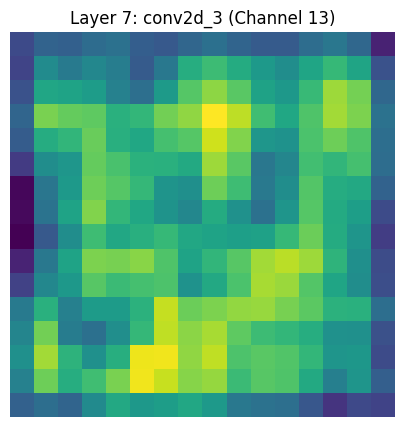

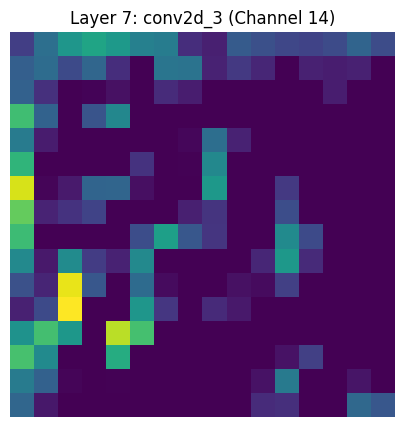

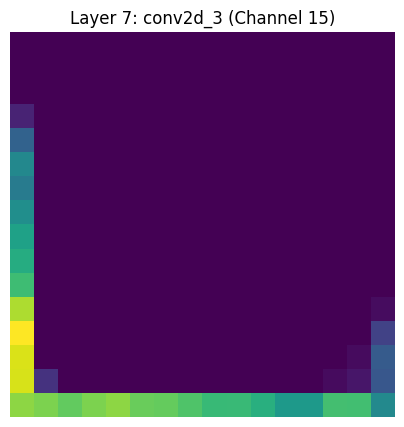

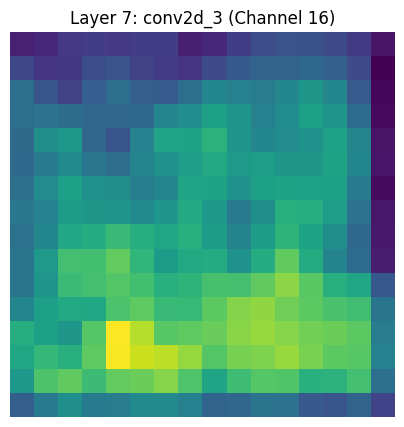

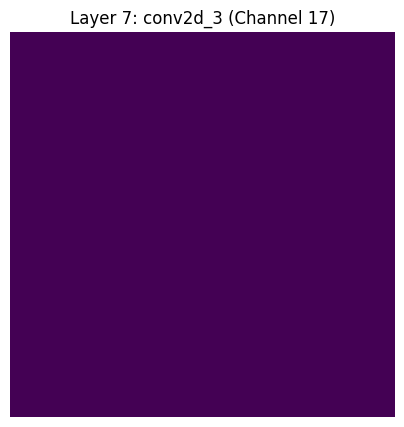

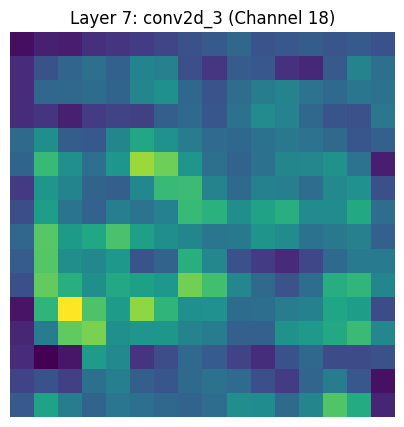

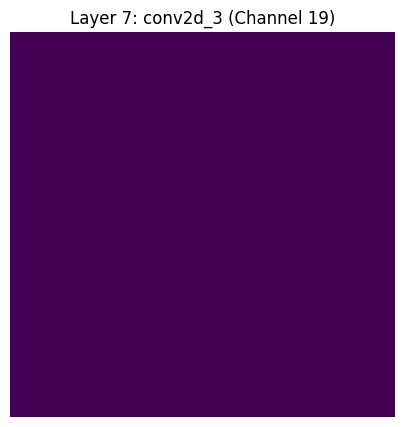

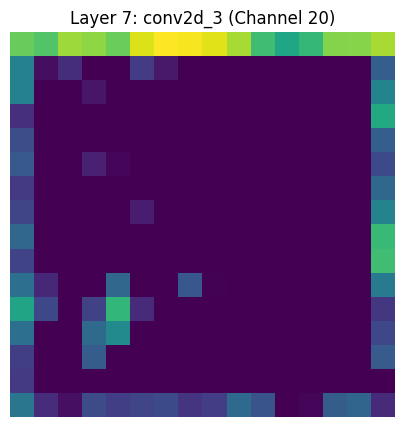

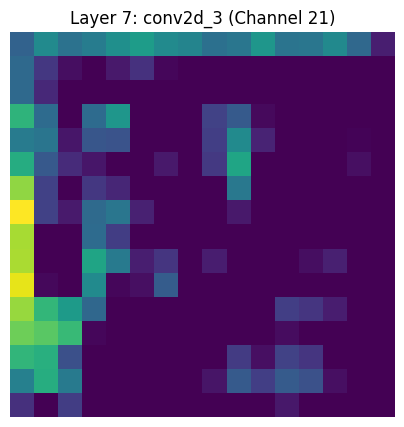

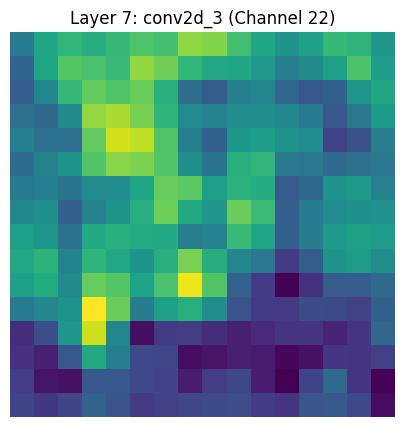

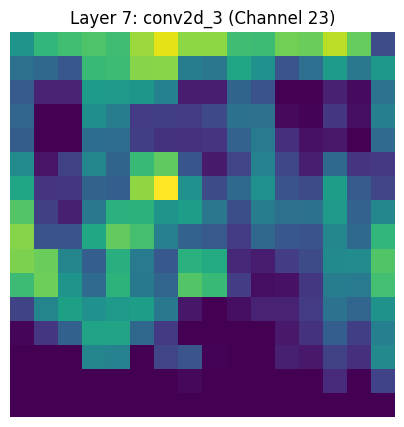

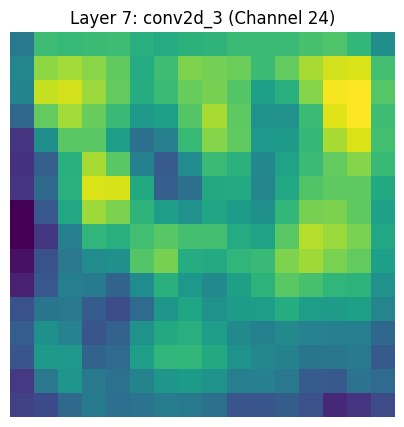

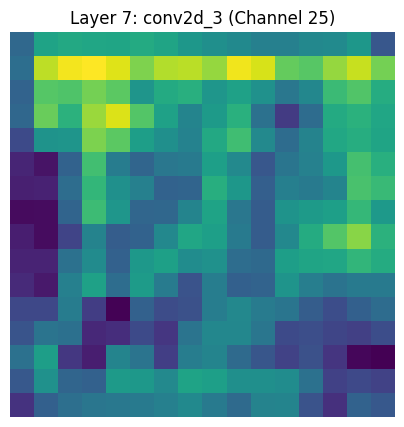

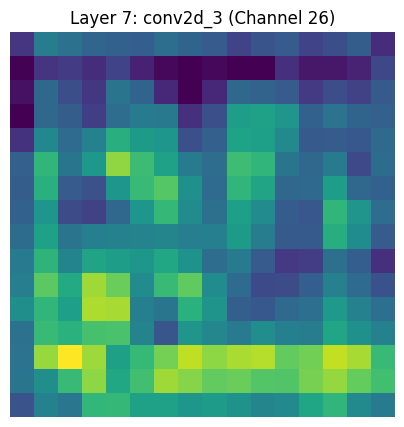

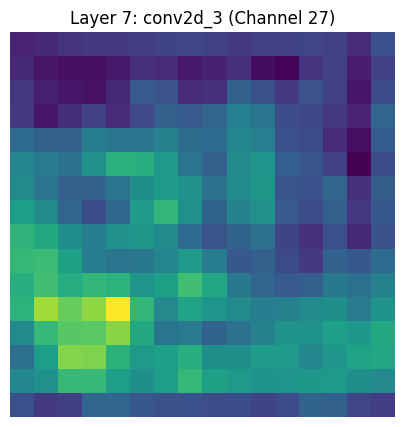

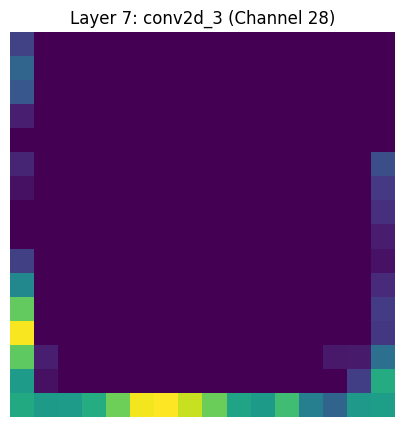

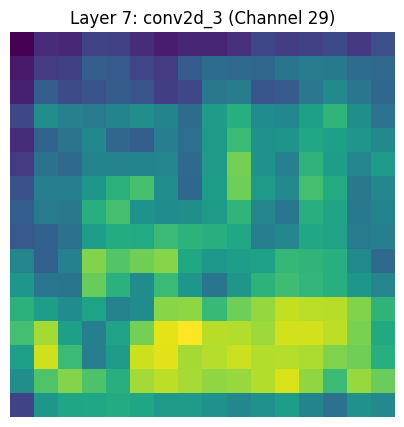

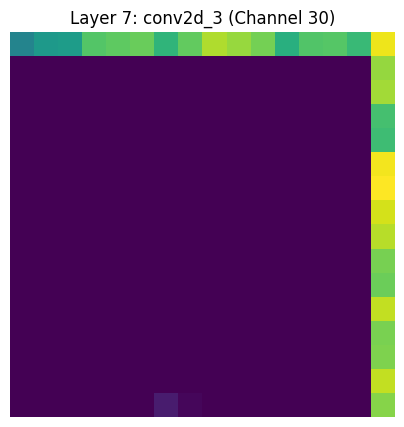

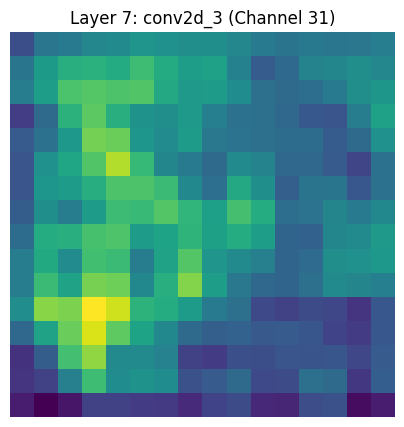

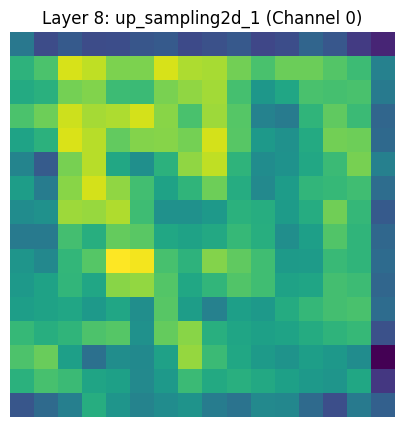

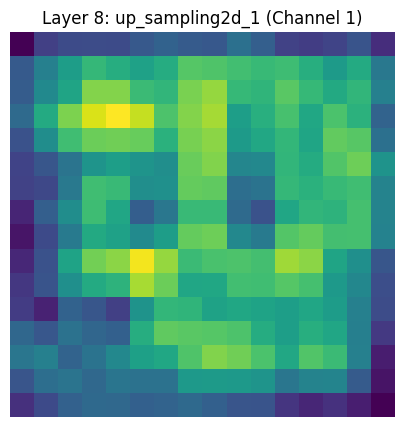

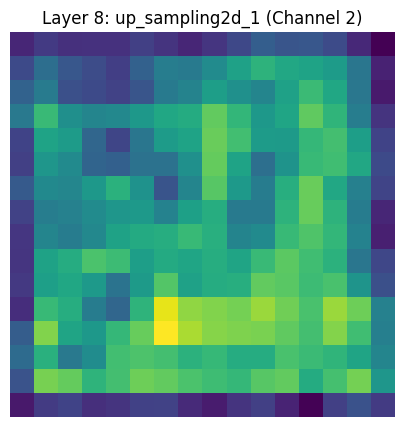

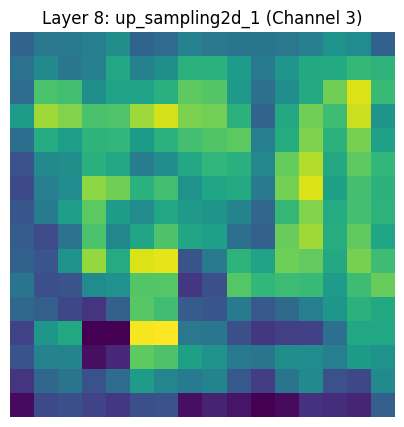

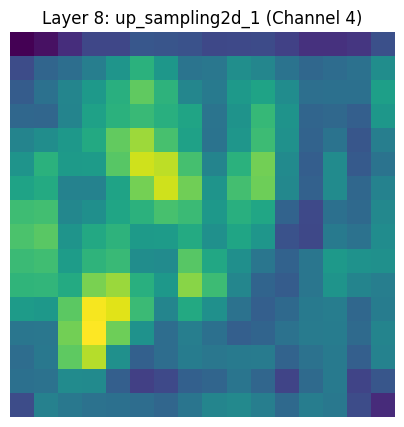

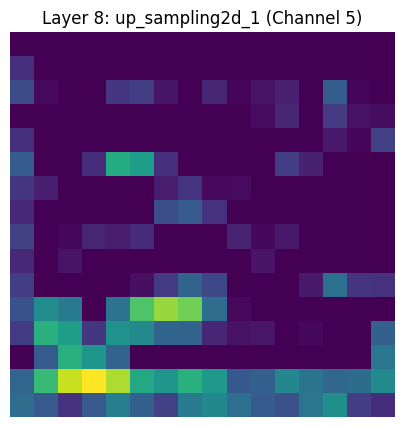

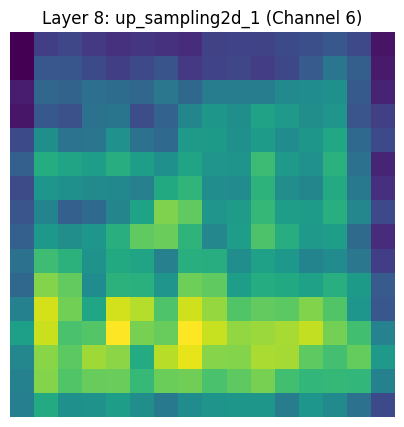

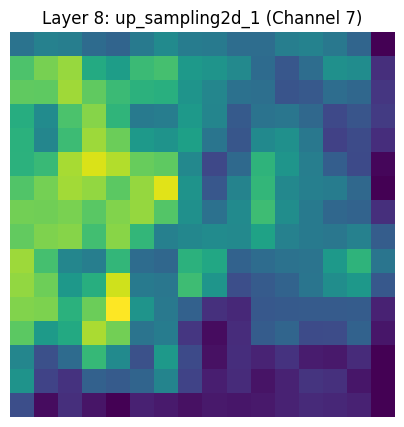

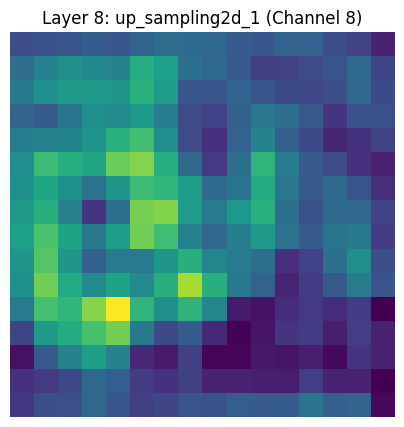

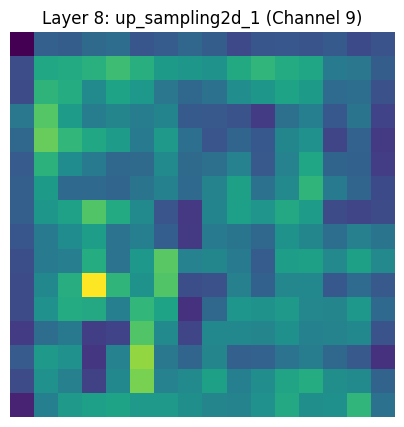

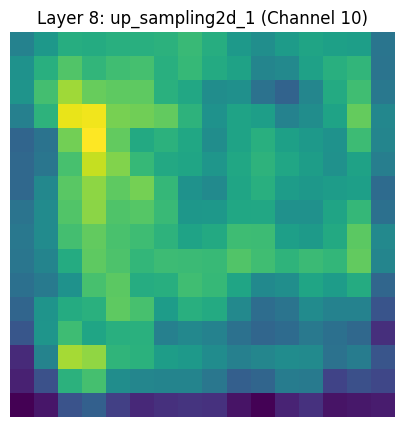

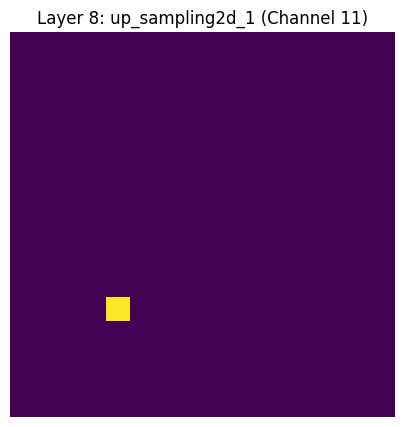

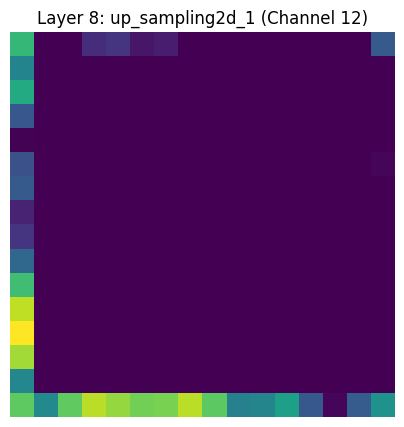

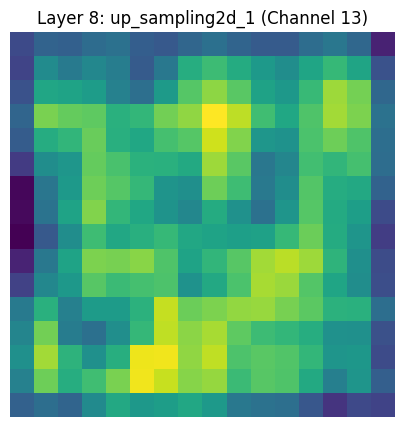

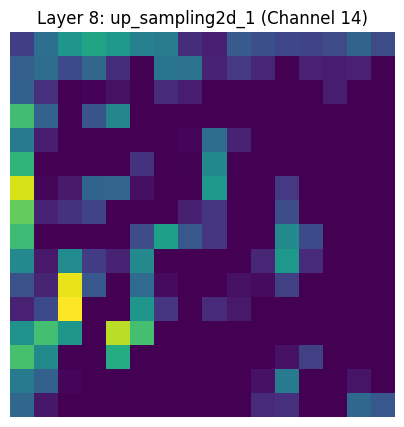

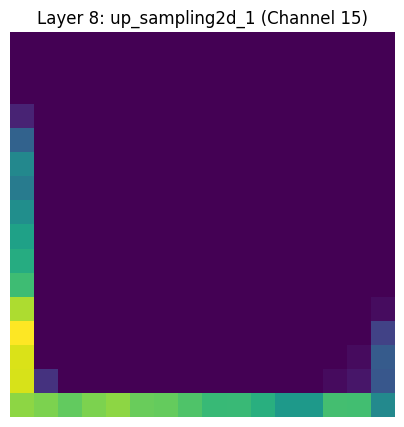

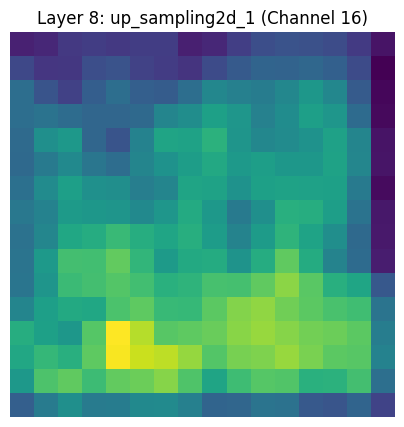

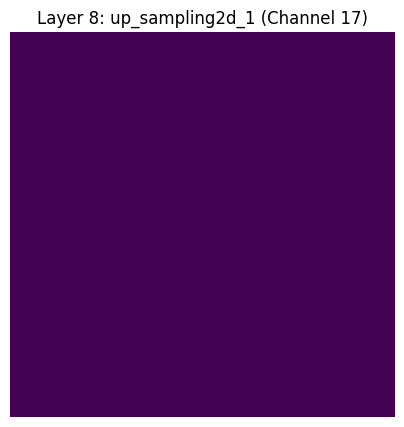

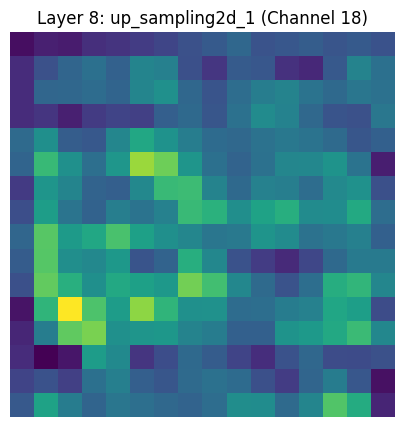

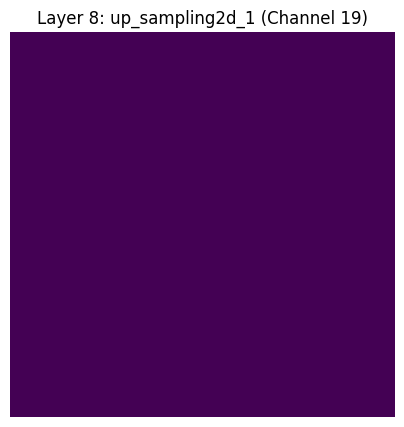

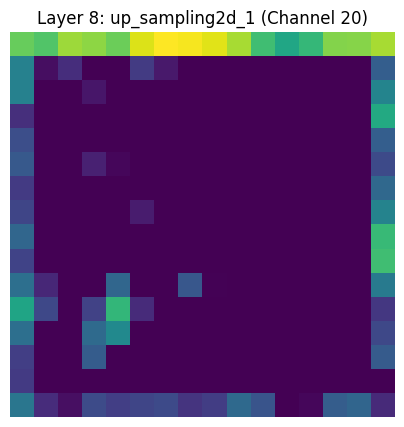

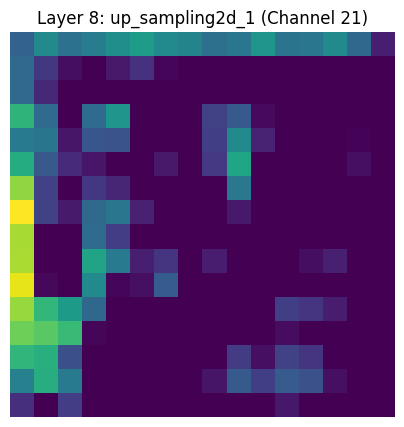

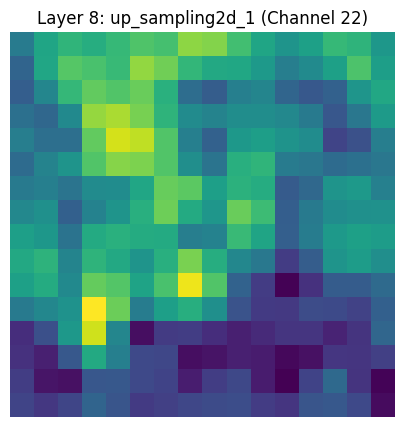

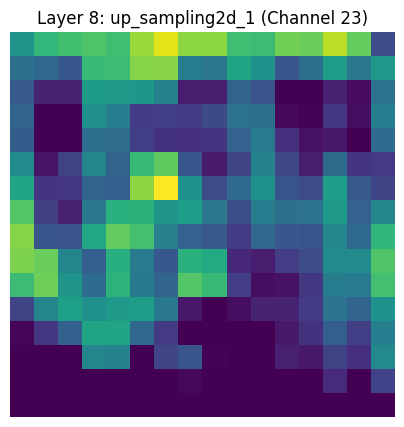

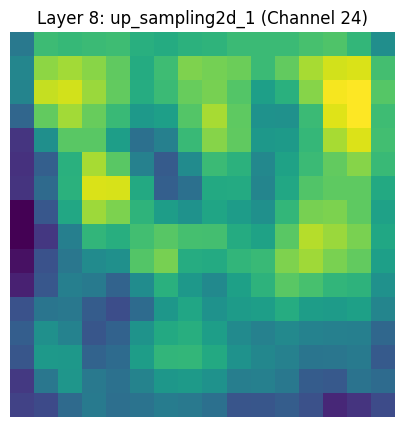

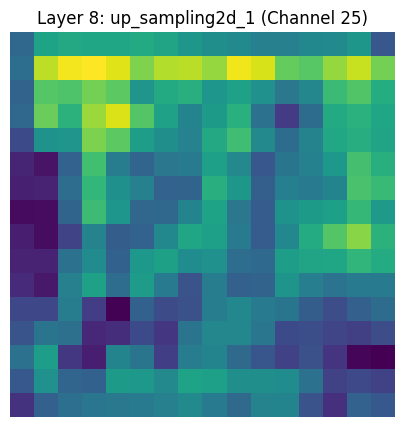

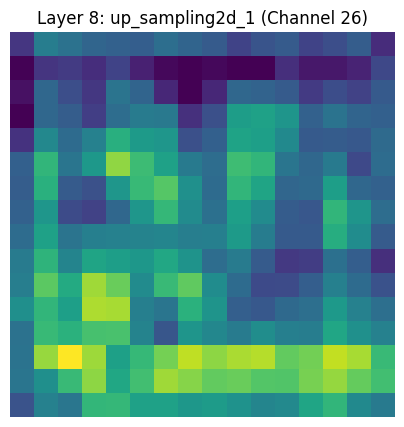

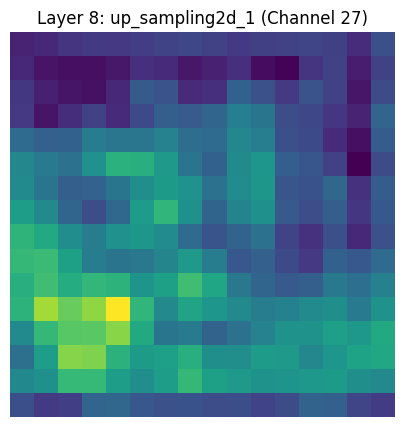

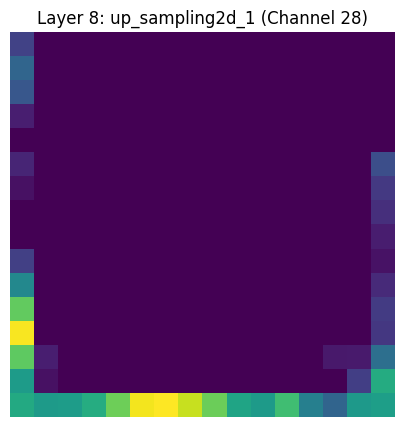

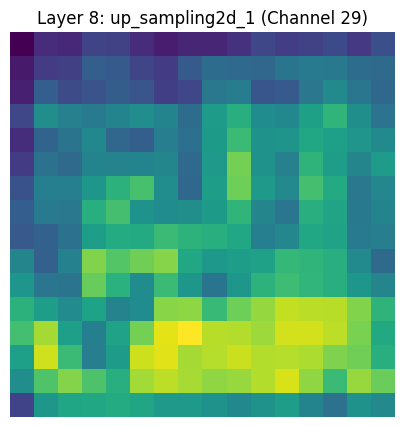

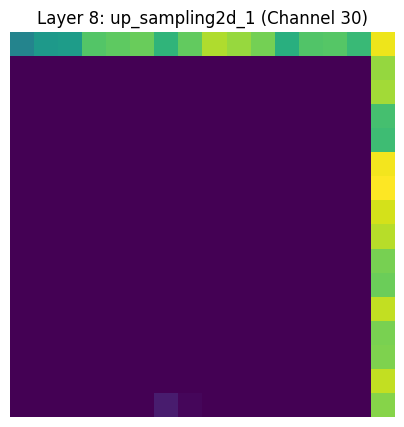

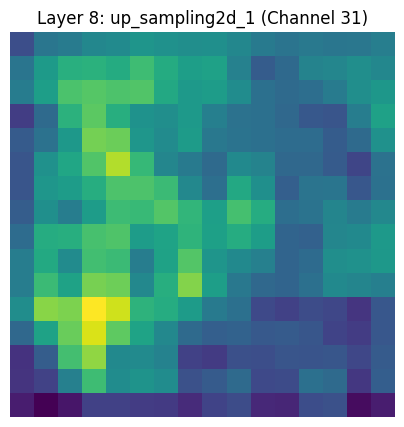

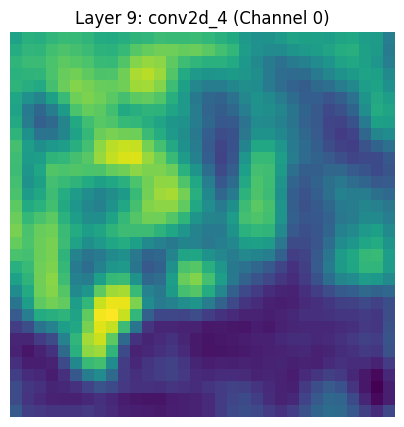

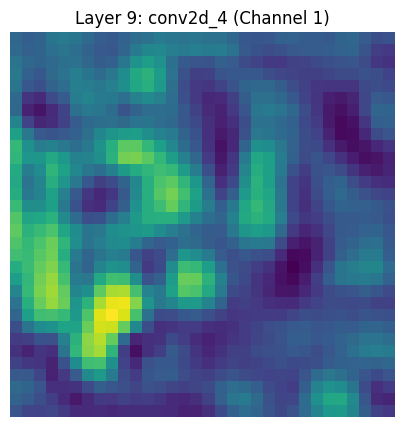

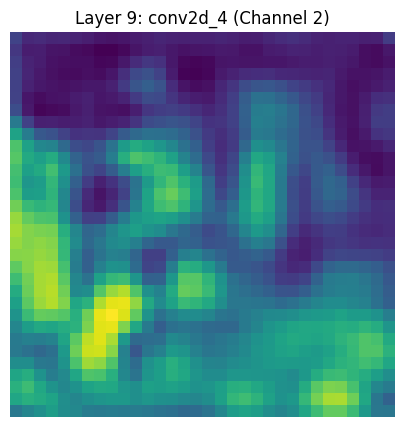

In [5]:
# Visualize outputs at each layer and each channel within those layers
for layer_idx, output in enumerate(layer_outputs):
    num_channels = output.shape[-1]
    for ch in range(num_channels):
        plt.figure(figsize=(5, 5))
        plt.imshow(output[0, :, :, ch], cmap="viridis")
        plt.title(
            f"Layer {layer_idx}: {autoencoder.layers[layer_idx].name} (Channel {ch})"
        )
        plt.axis("off")
        plt.show()